# Analysis and Prediction on the Coronavirus (Italy)



> ## Related Work
*  For Analysis and Prediction on the Coronavirus (Iran), click [here](https://www.kaggle.com/vanshjatana/analysis-and-prediction-on-coronavirus-iran)
*  For Analysis and Prediction on the Coronavirus (South Korea), click [here](https://www.kaggle.com/vanshjatana/analysis-on-coronavirus)
*  For Machine Learning on the Coronavirus, click [here](https://www.kaggle.com/vanshjatana/machine-learning-on-coronavirus)
*  For a report on the Coronavirus, click [here](https://www.researchgate.net/publication/339738108_Analysis_On_Coronavirus)

## Current Scenario

At the time of this writing, there are 9,172 confirmed cases according to the WHO. Italy is a member state of the European Union and is a popular tourist destination. Italy's first case was confirmed on January 30th, when two infected Chinese tourists were found. Italy is the most infected country in Europe and second most affected region after China. Many Italian visitors were confirmed as being infected with Coronavirus after visiting other countries. Many countries, including Asia, America, and Europe, trace their local cases to Italy. In the very beginning of the outbreak, only the northern area of Italy was affected; but after a very short time, it had spread to all of Italy.

## Libraries

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install fbprophet
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install tensorflow
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import datetime
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

     |████████████████████████████████| 20.2MB 3.3MB/s eta 0:00:01    |███████████▏                    | 7.0MB 3.3MB/s eta 0:00:05
     |████████████████████████████████| 10.0MB 3.0MB/s eta 0:00:01
     |████████████████████████████████| 512kB 43.8MB/s eta 0:00:01
     |████████████████████████████████| 225kB 3.5MB/s eta 0:00:01
     |████████████████████████████████| 26.1MB 8.7MB/s eta 0:00:01
     |████████████████████████████████| 12.4MB 33.0MB/s eta 0:00:01
     |████████████████████████████████| 71kB 28.1MB/s eta 0:00:01
     |████████████████████████████████| 92kB 26.0MB/s eta 0:00:01
     |████████████████████████████████| 11.5MB 3.3MB/s eta 0:00:01    |███████████                     | 3.9MB 3.3MB/s eta 0:00:03
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11428 sha256=b8a6a0be7689fe2df077a8d7e30bf1d763d85aca117da8ee67cc4eef5d85f9c9
  Stored in directory: /home/jovyan/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Su

Using TensorFlow backend.


## Reading Data

In [2]:
data=pd.read_csv("../input/covid19-in-total/covid19_italy_region.csv")
data.head()


SNo                 Date Country  RegionCode    RegionName   Latitude  \
0    0  2020-02-24 18:00:00     ITA          13       Abruzzo  42.351222   
1    1  2020-02-24 18:00:00     ITA          17    Basilicata  40.639471   
2    2  2020-02-24 18:00:00     ITA           4  P.A. Bolzano  46.499335   
3    3  2020-02-24 18:00:00     ITA          18      Calabria  38.905976   
4    4  2020-02-24 18:00:00     ITA          15      Campania  40.839566   

   Longitude  HospitalizedPatients  IntensiveCarePatients  \
0  13.398438                     0                      0   
1  15.805148                     0                      0   
2  11.356624                     0                      0   
3  16.594402                     0                      0   
4  14.250850                     0                      0   

   TotalHospitalizedPatients  HomeConfinement  CurrentPositiveCases  \
0                          0                0                     0   
1                          0                0                     0   
2                          0                0                     0   
3                          0                0                     0   
4                          0                0                     0   

   NewPositiveCases  Recovered  Deaths  TotalPositiveCases  TestsPerformed  
0                 0          0       0                   0               5  
1                 0          0       0                   0               0  
2                 0          0       0                   0               1  
3                 0          0       0                   0               1  
4                 0          0       0                   0              10

In [3]:
an_data = pd.read_csv("../input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv")

## Looking into the Data

In [4]:
an_data.head()

ID age     sex                        city province country  \
0  1.0  30    male     Chaohu City, Hefei City    Anhui   China   
1  2.0  47    male  Baohe District, Hefei City    Anhui   China   
2  3.0  49    male  High-Tech Zone, Hefei City    Anhui   China   
3  4.0  47  female  High-Tech Zone, Hefei City    Anhui   China   
4  5.0  50  female  Feidong County, Hefei City    Anhui   China   

   wuhan(0)_not_wuhan(1)   latitude   longitude geo_resolution  ...  \
0                    1.0  31.646960  117.716600         admin3  ...   
1                    1.0  31.778630  117.331900         admin3  ...   
2                    1.0  31.828313  117.224844          point  ...   
3                    1.0  31.828313  117.224844          point  ...   
4                    1.0  32.001230  117.568100         admin3  ...   

  Unnamed: 35 Unnamed: 36 Unnamed: 37 Unnamed: 38 Unnamed: 39 Unnamed: 40  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

  Unnamed: 41 Unnamed: 42 Unnamed: 43  Unnamed: 44  
0         NaN         NaN         NaN          NaN  
1         NaN         NaN         NaN          NaN  
2         NaN         NaN         NaN          NaN  
3         NaN         NaN         NaN          NaN  
4         NaN         NaN         NaN          NaN  

[5 rows x 45 columns]

In [5]:
an_data = an_data[an_data['country']=='Italy']
an_data.shape


(588, 45)

## Age Distribution of Confirmation

[(0.0, 133.1891721424099)]

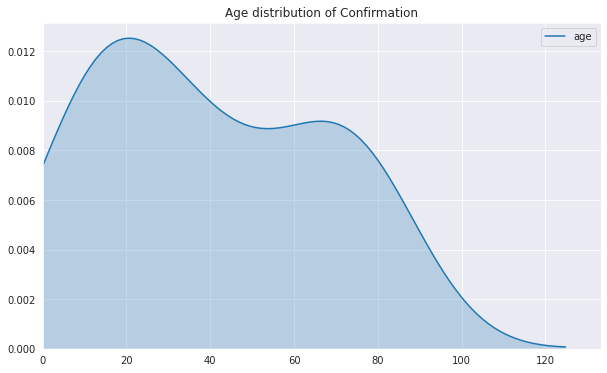

In [6]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of Confirmation")
sns.kdeplot(data=an_data['age'], shade=True).set(xlim=(0))

## Age

Here, the graph shows the age distribution of infected people by gender. We can clearly see that older people are more likely to become infected, especially older people that have lung disease or respiratory system problems. Men in the 40 to 50 year age group are more likely to be infected. In comparison, women aged 50 to 70 years are more likely to be infected. As Dr. Steven Gambert, professor of medicine and director of geriatrics at the University of Maryland School of Medicine says, "Older people have higher risk of underlying health conditions; older people are already under physical stress, and their immune systems, even if not significantly compromised, simply do not have the same ability to fight viruses and bacteria.” Data shows that Italy has the oldest population across the globe, by count. According to EU statistics, Italy has the lowest percentage of young people.

## Gender Distribution of Confirmation

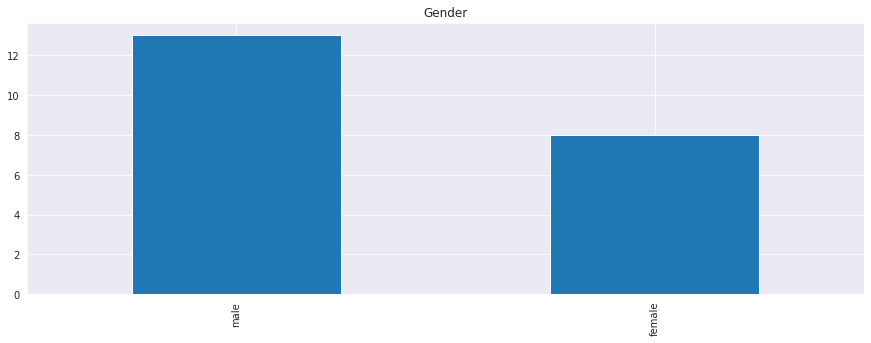

In [7]:
plt.figure(figsize=(15, 5))
plt.title('Gender')
an_data.sex.value_counts().plot.bar();

In [8]:
fig = px.pie( values=an_data.groupby(['sex']).size().values,names=an_data.groupby(['sex']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

## Gender

The graph shows the age distribution of infected and confirmed people by gender, where men are more likely to die from coronavirus than women. Research has found that middle-aged and older men are more likely to get infected by the virus. Researchers found that the infection rate among men and women is the same, but the death rate among men is 2.8% as compared to 1.7% for women. Some of the factors thought to explain why men are more likely to die from the coronavirus include:

* Men lack the heightened immunity system found in women
* In China, 50%-80% of men smoke, compared to only 2%-3% of women

## Age Distribution of Confirmation by Gender

In [9]:
male_dead = an_data[an_data.sex=='male']
female_dead = an_data[an_data.sex=='female']

[(0.0, 163.9277045948024)]

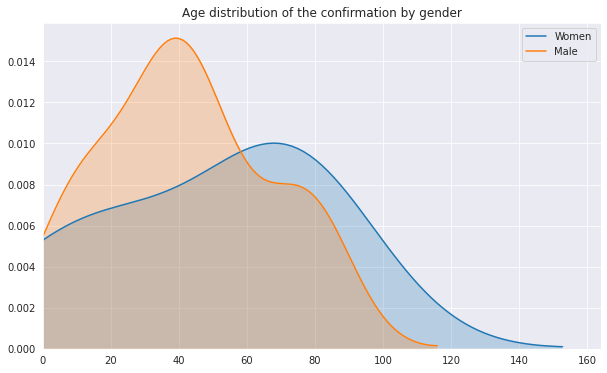

In [10]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the confirmation by gender")
sns.kdeplot(data=female_dead['age'], label="Women", shade=True).set(xlim=(0))
sns.kdeplot(data=male_dead['age'],label="Male" ,shade=True).set(xlim=(0))


In [11]:
data.head()

SNo                 Date Country  RegionCode    RegionName   Latitude  \
0    0  2020-02-24 18:00:00     ITA          13       Abruzzo  42.351222   
1    1  2020-02-24 18:00:00     ITA          17    Basilicata  40.639471   
2    2  2020-02-24 18:00:00     ITA           4  P.A. Bolzano  46.499335   
3    3  2020-02-24 18:00:00     ITA          18      Calabria  38.905976   
4    4  2020-02-24 18:00:00     ITA          15      Campania  40.839566   

   Longitude  HospitalizedPatients  IntensiveCarePatients  \
0  13.398438                     0                      0   
1  15.805148                     0                      0   
2  11.356624                     0                      0   
3  16.594402                     0                      0   
4  14.250850                     0                      0   

   TotalHospitalizedPatients  HomeConfinement  CurrentPositiveCases  \
0                          0                0                     0   
1                          0                0                     0   
2                          0                0                     0   
3                          0                0                     0   
4                          0                0                     0   

   NewPositiveCases  Recovered  Deaths  TotalPositiveCases  TestsPerformed  
0                 0          0       0                   0               5  
1                 0          0       0                   0               0  
2                 0          0       0                   0               1  
3                 0          0       0                   0               1  
4                 0          0       0                   0              10

## Checking for Null Values

In [12]:
data.isna().sum()

SNo                          0
Date                         0
Country                      0
RegionCode                   0
RegionName                   0
Latitude                     0
Longitude                    0
HospitalizedPatients         0
IntensiveCarePatients        0
TotalHospitalizedPatients    0
HomeConfinement              0
CurrentPositiveCases         0
NewPositiveCases             0
Recovered                    0
Deaths                       0
TotalPositiveCases           0
TestsPerformed               0
dtype: int64

## Description of the Data

In [13]:
data.describe().T

count         mean          std        min  \
SNo                        441.0   220.000000   127.449990   0.000000   
RegionCode                 441.0    10.190476     5.801646   1.000000   
Latitude                   441.0    43.046293     2.491607  38.115697   
Longitude                  441.0    12.225955     2.661968   7.320149   
HospitalizedPatients       441.0   142.387755   564.718077   0.000000   
IntensiveCarePatients      441.0    26.056689    86.363155   0.000000   
TotalHospitalizedPatients  441.0   168.446712   649.869992   0.000000   
HomeConfinement            441.0   111.945578   347.705017   0.000000   
CurrentPositiveCases       441.0   280.390023   972.878373   0.000000   
NewPositiveCases           441.0    46.718821   147.650810 -63.000000   
Recovered                  441.0    28.873016   166.511676   0.000000   
Deaths                     441.0    19.875283   103.391337   0.000000   
TotalPositiveCases         441.0   329.138322  1233.993654   0.000000   
TestsPerformed             441.0  2120.403628  5300.473114   0.000000   

                                  25%         50%          75%           max  
SNo                        110.000000  220.000000   330.000000    440.000000  
RegionCode                   5.000000   10.000000    15.000000     20.000000  
Latitude                    41.125596   43.616760    45.434905     46.499335  
Longitude                   11.121231   12.388247    13.768136     16.867367  
HospitalizedPatients         1.000000    8.000000    53.000000   5500.000000  
IntensiveCarePatients        0.000000    1.000000    11.000000    767.000000  
TotalHospitalizedPatients    1.000000    8.000000    64.000000   6267.000000  
HomeConfinement              1.000000   10.000000    71.000000   3776.000000  
CurrentPositiveCases         2.000000   19.000000   139.000000  10043.000000  
NewPositiveCases             0.000000    5.000000    30.000000   1336.000000  
Recovered                    0.000000    0.000000     3.000000   2011.000000  
Deaths                       0.000000    0.000000     3.000000   1218.000000  
TotalPositiveCases           3.000000   19.000000   143.000000  13272.000000  
TestsPerformed              46.000000  302.000000  1419.000000  40369.000000

## Tracking the Patient

In [14]:
data.shape

(441, 17)

In [15]:
clus=data.loc[:,['SNo','Latitude','Longitude']]
clus.head()

SNo   Latitude  Longitude
0    0  42.351222  13.398438
1    1  40.639471  15.805148
2    2  46.499335  11.356624
3    3  38.905976  16.594402
4    4  40.839566  14.250850

## Checking for Number of Cluster

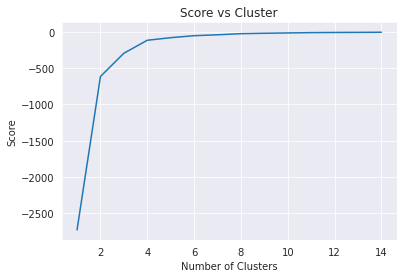

In [16]:
K_clusters = range(1,15)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = data[['Latitude']]
X_axis = data[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Score vs Cluster')
plt.show()

**The score becomes constant after four clusters, so making more clusters will not help us. The value for k is 4 in this case.**

In [17]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(clus[clus.columns[1:3]])
clus['cluster_label'] = kmeans.fit_predict(clus[clus.columns[1:3]])
centers = kmeans.cluster_centers_
labels = kmeans.predict(clus[clus.columns[1:3]])

## Graphical Representation of Clusters

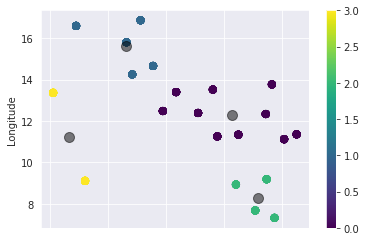

In [18]:
clus.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

**We will verify our clusters by putting values onto a world map generated through use of the folium library.**

**Affected places shown on the world map include Hospitalised, Confirm, Deaths, and Recovery.**

In [19]:
!{sys.executable} -m pip install folium
import folium
italy_map = folium.Map(location=[42.8719,12.5674 ], zoom_start=5,tiles='Stamen Toner')

for lat, lon,RegionName,TotalPositiveCases,Recovered,Deaths,TotalHospitalizedPatients in zip(data['Latitude'], data['Longitude'],data['RegionName'],data['TotalPositiveCases'],data['Recovered'],data['Deaths'],data['TotalHospitalizedPatients']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                      popup =('RegionName: ' + str(RegionName) + '<br>'
                    'TotalPositiveCases: ' + str(TotalPositiveCases) + '<br>'
                    'TotalHospitalizedPatients: ' + str(TotalHospitalizedPatients) + '<br>'
                      'Recovered: ' + str(Recovered) + '<br>'
                      'Deaths: ' + str(Deaths) + '<br>'),

                        fill_color='red',
                        fill_opacity=0.7 ).add_to(italy_map)
italy_map

     |████████████████████████████████| 102kB 3.6MB/s ta 0:00:011


**Early on, the most severely affected cities and regions in Italy were Lombardy and then Emilia-Romagna, Veneto, Marche, and Piemonte. Milan is the second most populous Italian city and is located in Lombardy. Other areas in Italy that are affected by coronavirus include Toscana, Campania, Lazio, Liguria, Friuli Venezia Giulia, Sicilia, Puglia, Umbria, Abruzzo, Trento, Molise, Calabria, Sardegna, Valle d’Aosta, Basilicata, and Bolzano. Italy was the fourth most affected country as of February, but now it has the highest number of confirmed cases after China.**

## Grouping Data According to Region Name

In [20]:
data['Date'] = pd.to_datetime(data['Date']).dt.normalize()
daily = data.sort_values(['Date','Country','RegionName'])
latest = data[data.Date == daily.Date.max()]
latest.head()

SNo       Date Country  RegionCode    RegionName   Latitude  Longitude  \
420  420 2020-03-15     ITA          13       Abruzzo  42.351222  13.398438   
421  421 2020-03-15     ITA          17    Basilicata  40.639471  15.805148   
422  422 2020-03-15     ITA           4  P.A. Bolzano  46.499335  11.356624   
423  423 2020-03-15     ITA          18      Calabria  38.905976  16.594402   
424  424 2020-03-15     ITA          15      Campania  40.839566  14.250850   

     HospitalizedPatients  IntensiveCarePatients  TotalHospitalizedPatients  \
420                    72                     28                        100   
421                     0                      2                          2   
422                    50                      4                         54   
423                    32                      6                         38   
424                    73                     22                         95   

     HomeConfinement  CurrentPositiveCases  NewPositiveCases  Recovered  \
420               28                   128                22          6   
421                9                    11                 1          0   
422              145                   199                29          0   
423               28                    66                 7          1   
424              201                   296                53         28   

     Deaths  TotalPositiveCases  TestsPerformed  
420       3                 137            1419  
421       0                  11             208  
422       5                 204            1497  
423       1                  68             884  
424       9                 333            2213

In [21]:
data_groupby_region = latest.groupby("RegionName")[['TotalPositiveCases', 'Deaths', 'Recovered','TestsPerformed','HospitalizedPatients','TotalHospitalizedPatients']].sum().reset_index()
dgr = data_groupby_region 
dgr.head()

RegionName  TotalPositiveCases  Deaths  Recovered  TestsPerformed  \
0         Abruzzo                 137       3          6            1419   
1      Basilicata                  11       0          0             208   
2        Calabria                  68       1          1             884   
3        Campania                 333       9         28            2213   
4  Emilia Romagna                3093     284         68           12054   

   HospitalizedPatients  TotalHospitalizedPatients  
0                    72                        100  
1                     0                          2  
2                    32                         38  
3                    73                         95  
4                  1215                       1384

## Description of Grouped Data by Region

In [22]:
dgr.describe().T

count         mean           std    min    25%  \
TotalPositiveCases          21.0  1178.428571   2876.244645   11.0  137.0   
Deaths                      21.0    86.142857    266.741127    0.0    2.0   
Recovered                   21.0   111.190476    436.261231    0.0    0.0   
TestsPerformed              21.0  5947.571429  10613.996710  208.0  965.0   
HospitalizedPatients        21.0   460.142857   1192.702238    0.0   32.0   
TotalHospitalizedPatients   21.0   539.761905   1357.938434    2.0   38.0   

                              50%     75%      max  
TotalPositiveCases          333.0   781.0  13272.0  
Deaths                        8.0    33.0   1218.0  
Recovered                     5.0    24.0   2011.0  
TestsPerformed             2017.0  4375.0  40369.0  
HospitalizedPatients         73.0   253.0   5500.0  
TotalHospitalizedPatients   100.0   319.0   6267.0

## Test Performed vs Region

In [23]:
fig = px.bar(dgr[['RegionName', 'TestsPerformed']].sort_values('TestsPerformed', ascending=False), 
             y="TestsPerformed", x="RegionName", color='RegionName', 
             log_y=True, template='ggplot2', title='Test Performed vs Region')
fig.show()


**As the graph shows, the test was performed in different regions of Italy. Lombardia shows the maximum number of tests performed (over 25,000), as cities are most highly affected. As a result, the next graph shows that the region also has the highest number of positive coronavirus patients (7,280). Veneto is the second most infected city, followed by Emilia Romagna, Lazio, Marche, Toscana, Piemonte, Friuli V.G., Campania, Sicilia, Liguria, Puglia, P.A. Trento, Calabria, Umbria, Abruzzo, Sardegna, Molisa, Basilicata, Valle d'Aosta, P.A. Bolzano, etc.**

## Confirmed Cases vs Region

In [24]:
fig = px.bar(dgr[['RegionName', 'TotalPositiveCases']].sort_values('TotalPositiveCases', ascending=False), 
             y="TotalPositiveCases", x="RegionName", color='RegionName', 
             log_y=True, template='ggplot2', title='Confirmed Cases vs Region')
fig.show()


**There are more than 10,000 people who are infected with this virus. Italy is the most affected country in the world after China, with 827 deaths and 12,462 confirmed cases in almost three weeks. The government has restricted all flights from China because, at the end of January, two Chinese tourists came down with coronavirus during a trip to Italy. At the time, it was hoped to be the best measure to block the spread of the disease.**

## Hospitalized Patients vs Region

In [25]:
fig = px.bar(dgr[['RegionName', 'TotalHospitalizedPatients']].sort_values('TotalHospitalizedPatients', ascending=False), 
             y="TotalHospitalizedPatients", x="RegionName", color='RegionName', 
             log_y=True, template='ggplot2', title='Hospitalised Patient vs Region')
fig.show()

## Recovery vs Region

In [26]:
fig = px.bar(dgr[['RegionName', 'Recovered']].sort_values('Recovered', ascending=False), 
             y="Recovered", x="RegionName", color='RegionName', 
             log_y=True, template='ggplot2', title='Revovery vs Region')
fig.show()


## Death vs Region Name

In [27]:
fig = px.bar(dgr[['RegionName', 'Deaths']].sort_values('Deaths', ascending=False), 
             y="Deaths", x="RegionName", color='RegionName', 
             log_y=True, template='ggplot2', title='Death vs Region')
fig.show()


In [28]:
dgrs_el = dgr.sort_values(by=['TotalPositiveCases'],ascending = False)
dgrs_el.head()

RegionName  TotalPositiveCases  Deaths  Recovered  TestsPerformed  \
8        Lombardia               13272    1218       2011           40369   
4   Emilia Romagna                3093     284         68           12054   
20          Veneto                2172      63        120           32546   
9           Marche                1133      46          0            2946   
13        Piemonte                1111      81          0            4375   

    HospitalizedPatients  TotalHospitalizedPatients  
8                   5500                       6267  
4                   1215                       1384  
20                   426                        555  
9                    521                        619  
13                   726                        897

## Test and Confirm vs Region

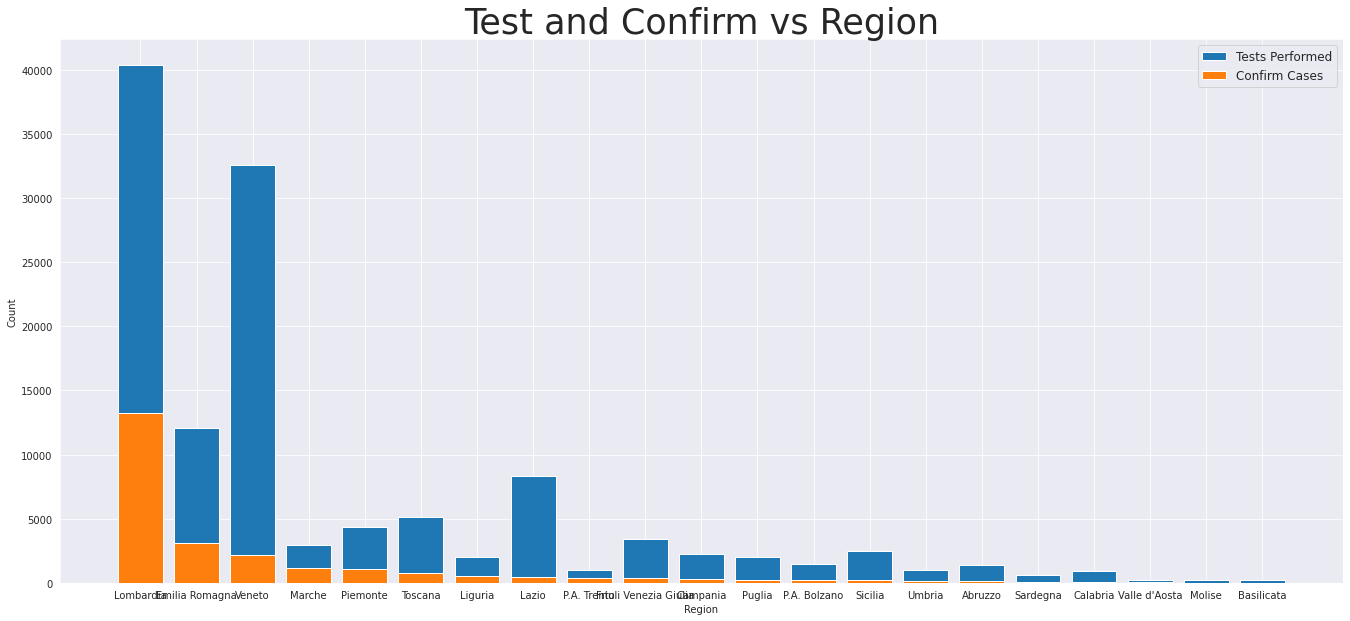

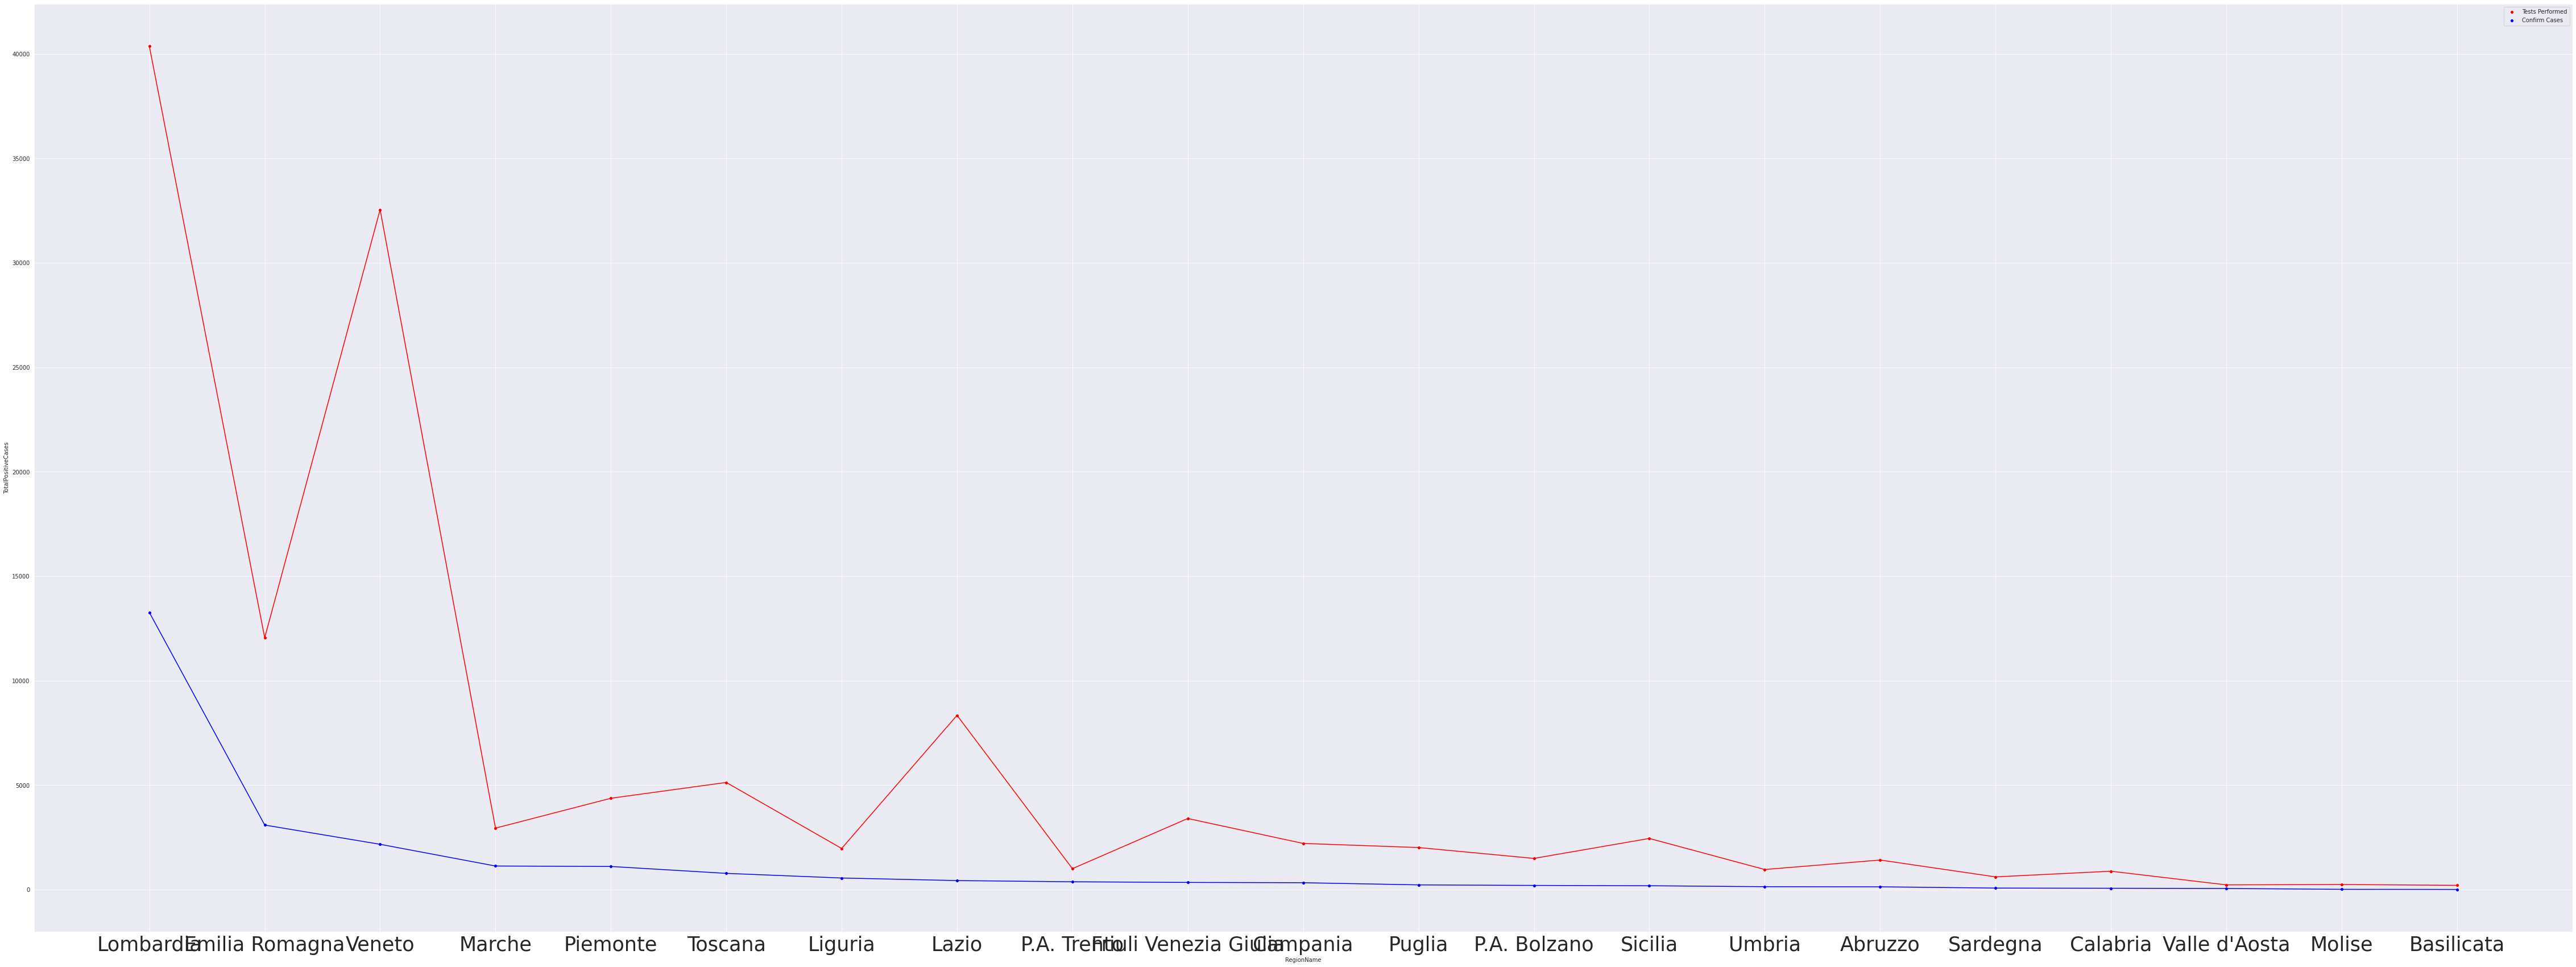

In [29]:
plt.figure(figsize=(23,10))
plt.bar(dgrs_el.RegionName, dgrs_el.TestsPerformed,label="Tests Performed")
plt.bar(dgrs_el.RegionName, dgrs_el.TotalPositiveCases,label="Confirm Cases")
plt.xlabel('Region')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Test and Confirm vs Region',fontsize = 35)

plt.show()

f, ax = plt.subplots(figsize=(80,30))
ax=sns.scatterplot(x="RegionName", y="TestsPerformed", data=dgrs_el,
             color="red",label = "Tests Performed")
ax=sns.scatterplot(x="RegionName", y="TotalPositiveCases", data=dgrs_el,
             color="blue",label = "Confirm Cases")
ax.xaxis.set_tick_params(labelsize=35)

plt.plot(dgrs_el.RegionName,dgrs_el.TestsPerformed,zorder=1,color="red")
plt.plot(dgrs_el.RegionName,dgrs_el.TotalPositiveCases,zorder=1,color="blue")

## Confirmed Cases vs People Hospitalized

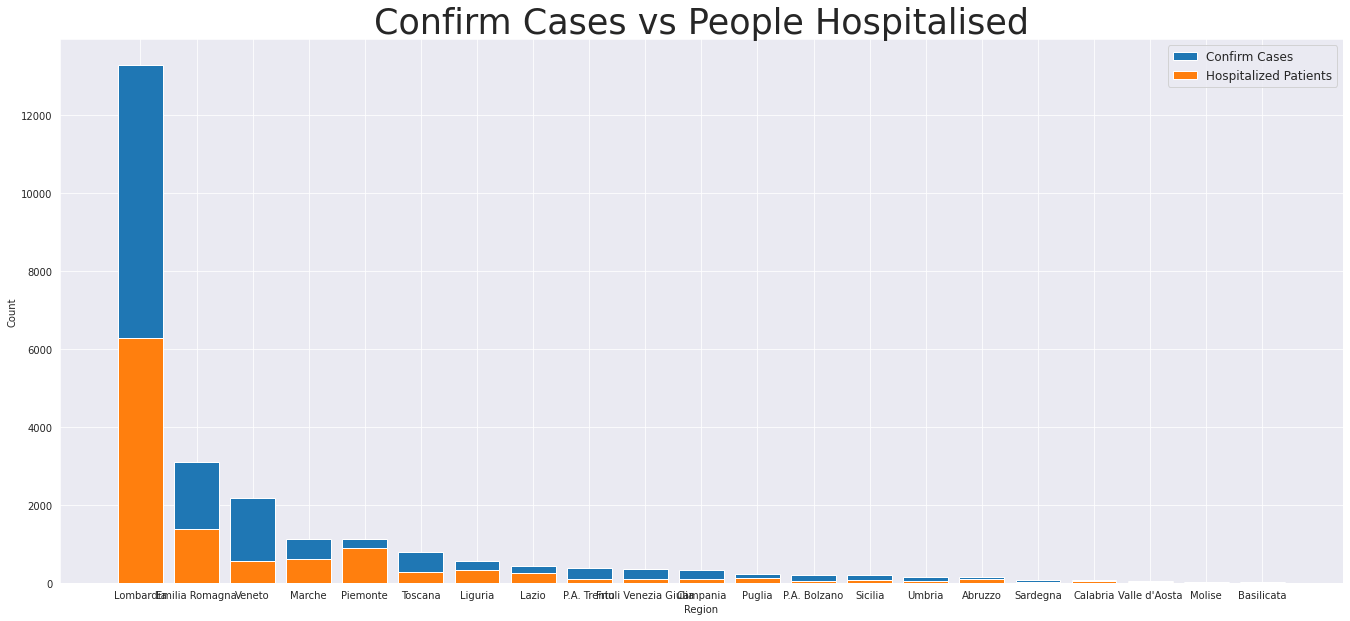

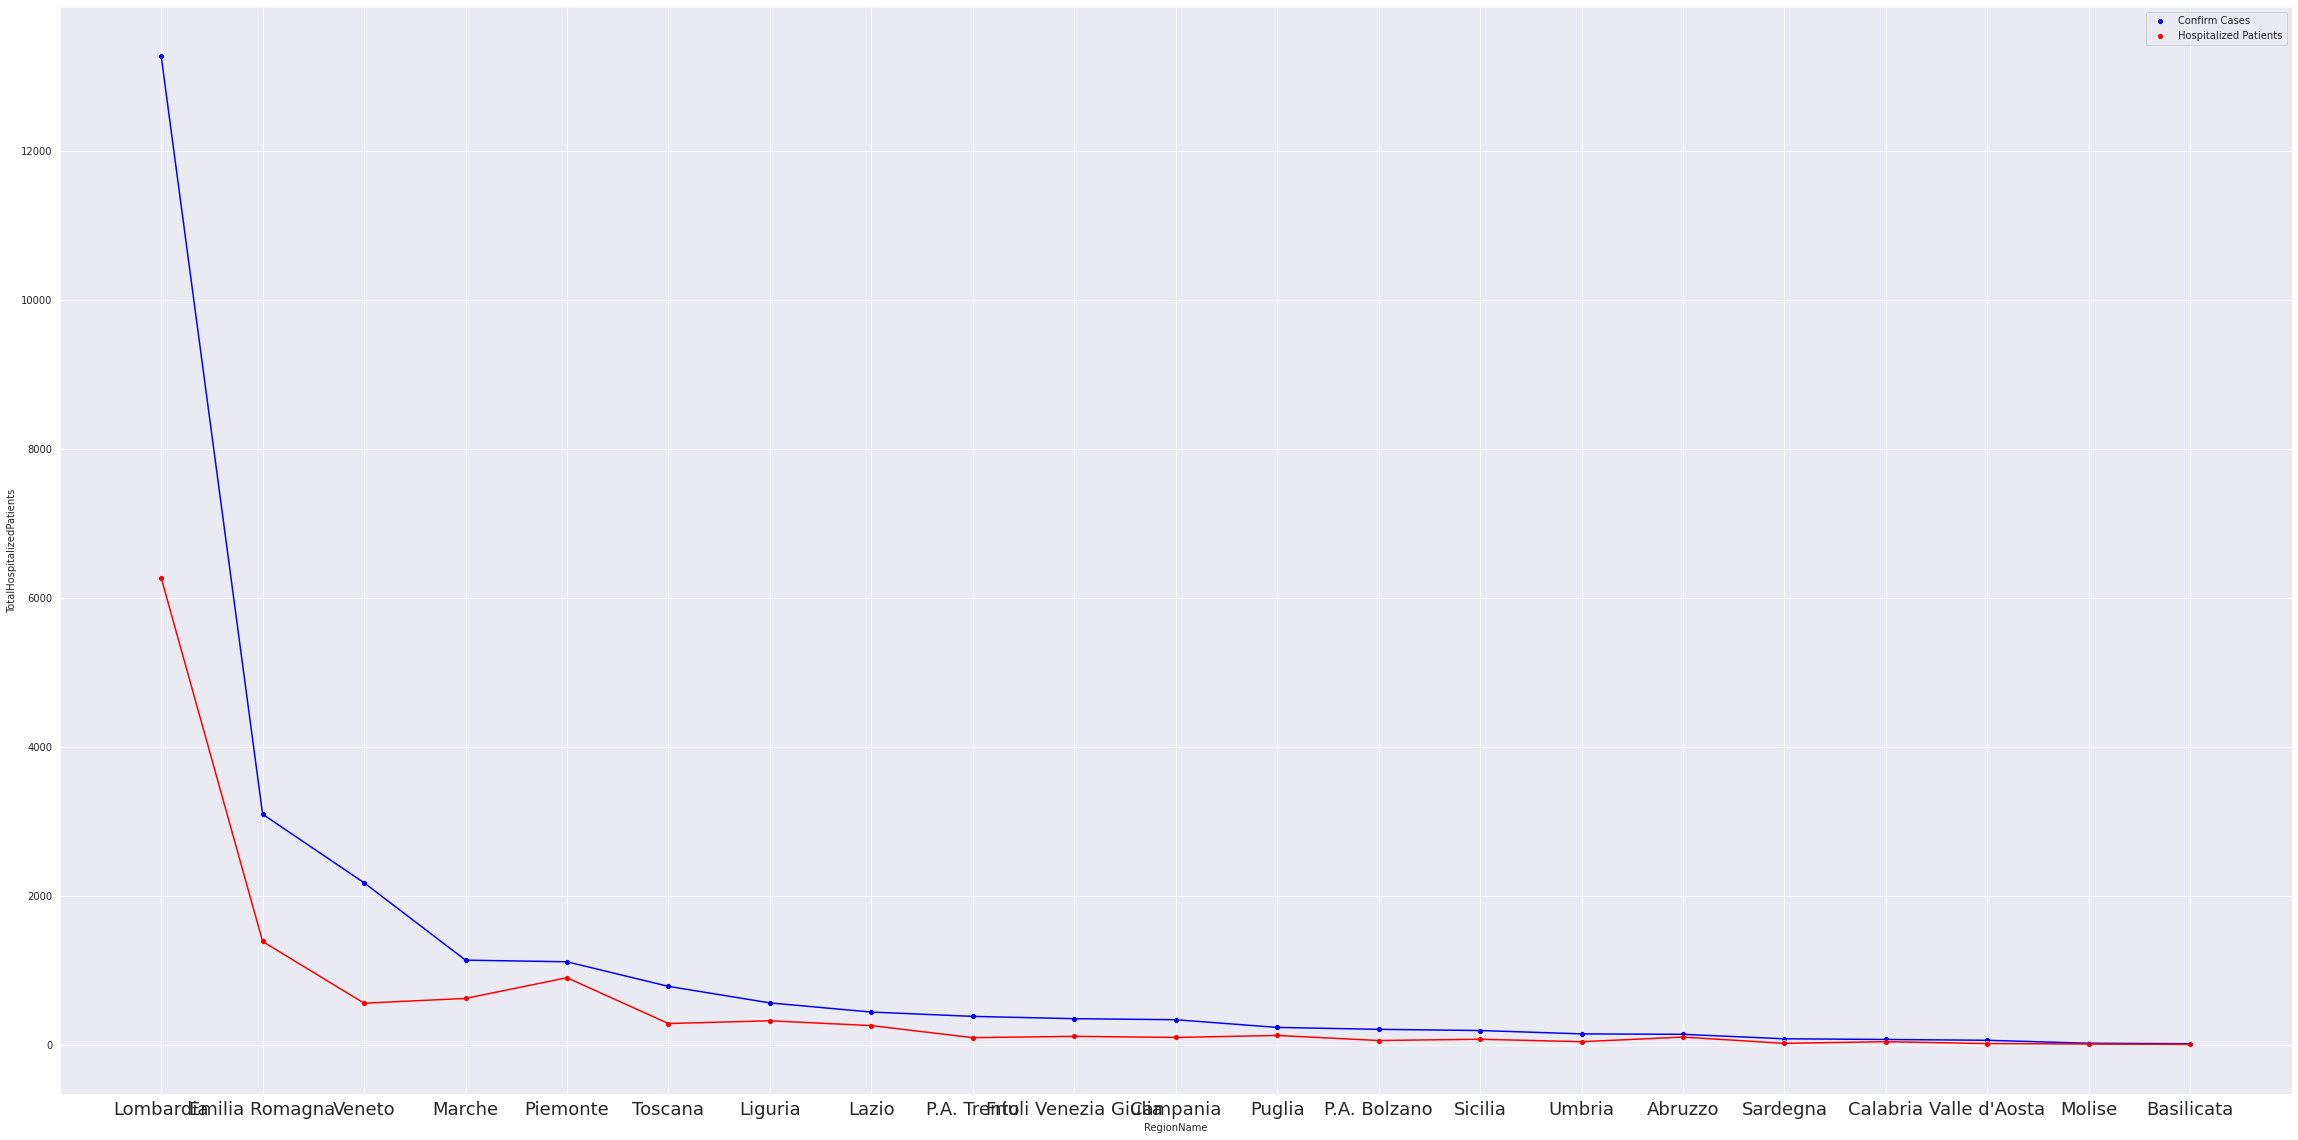

In [30]:
plt.figure(figsize=(23,10))
plt.bar(dgrs_el.RegionName, dgrs_el.TotalPositiveCases,label="Confirm Cases")
plt.bar(dgrs_el.RegionName, dgrs_el.TotalHospitalizedPatients,label="Hospitalized Patients")

plt.xlabel('Region')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirm Cases vs People Hospitalised',fontsize= 35)
plt.show()

f, ax = plt.subplots(figsize=(40,20))

ax=sns.scatterplot(x="RegionName", y="TotalPositiveCases", data=dgrs_el,
             color="blue",label = "Confirm Cases")
ax=sns.scatterplot(x="RegionName", y="TotalHospitalizedPatients", data=dgrs_el,
             color="red",label = "Hospitalized Patients")
ax.xaxis.set_tick_params(labelsize=18)
plt.plot(dgrs_el.RegionName,dgrs_el.TotalPositiveCases,zorder=1,color="blue")
plt.plot(dgrs_el.RegionName,dgrs_el.TotalHospitalizedPatients,zorder=1,color="red")


**The graph shows statistical data direct from the WHO. The data shows that in Lombardia, after more than 7,000 confirmed cases, there are only approximately 4,500 people who are hospitalized. This has become a crisis situation in Italy. Hospital conditions are becoming worse day by day. According to the doctors, not every patient is getting proper and equal care, and that is the main cause of multifold spread of coronavirus. The whole country is locked down. Government has announced there will be no gatherings, no sporting events, and no travelling across the country because of the high number of deaths.**

## Death and Recovery vs Region

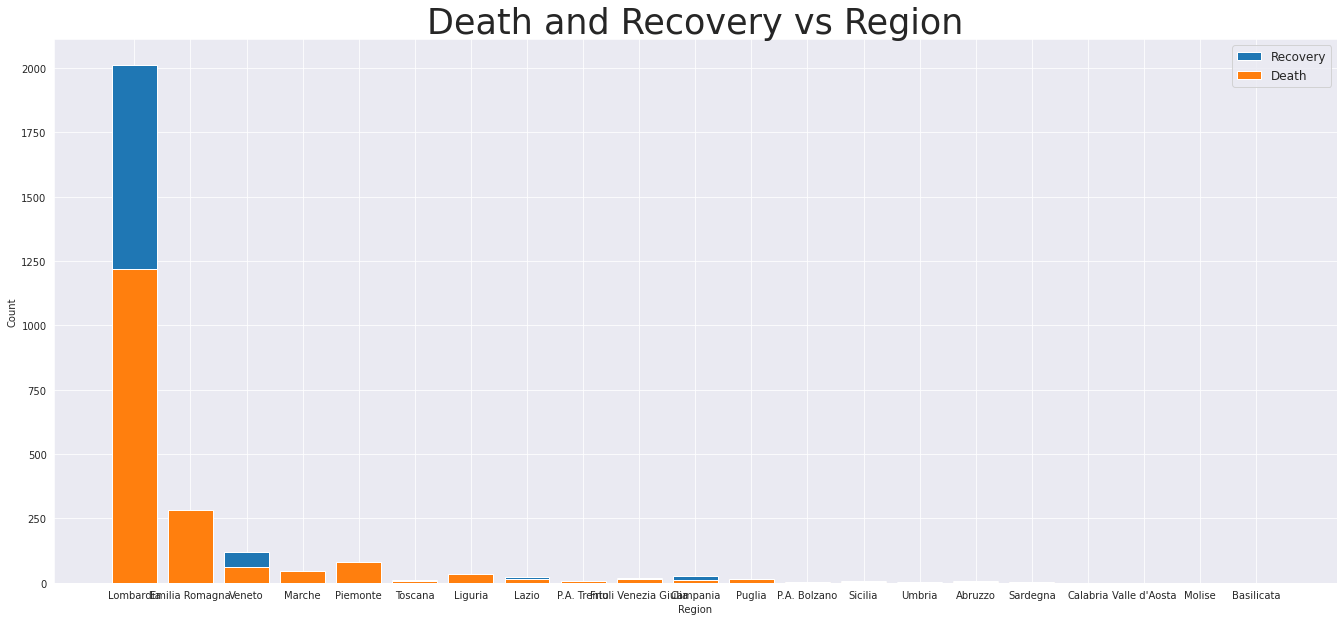

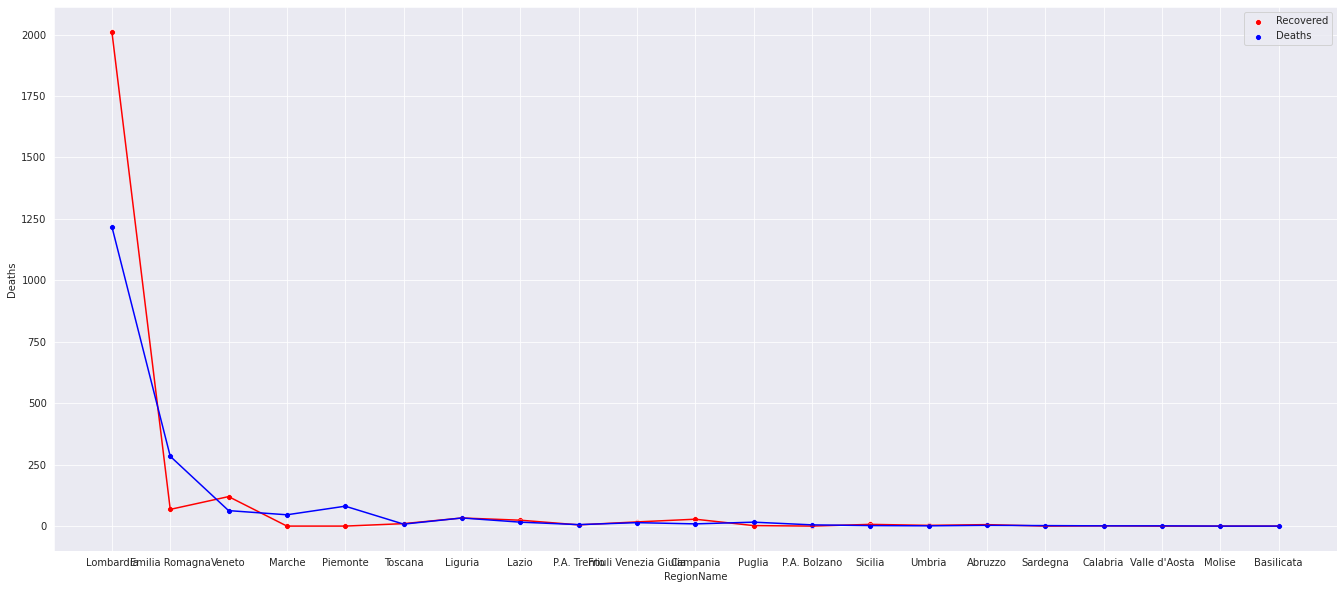

In [31]:
plt.figure(figsize=(23,10))
plt.bar(dgrs_el.RegionName, dgrs_el.Recovered,label="Recovery")
plt.bar(dgrs_el.RegionName, dgrs_el.Deaths,label="Death")
plt.xlabel('Region')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Death and Recovery vs Region', fontsize= 35)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="RegionName", y="Recovered", data=dgrs_el,
             color="red",label = "Recovered")
ax=sns.scatterplot(x="RegionName", y="Deaths", data=dgrs_el,
             color="blue",label = "Deaths")
plt.plot(dgrs_el.RegionName,dgrs_el.Recovered,zorder=1,color="red")
plt.plot(dgrs_el.RegionName,dgrs_el.Deaths,zorder=1,color="blue")

**According to the graph, the recovery rate of the patients is very slow. There are a few common reasons behind the rapid increase in the number of people infected by the coronavirus. According to the data, the number of hospitalized people is far fewer than the number of people infected by the novel coronavirus. Cases have now been confirmed in every member nation of the European Union. Italy will remain totally locked down as its healthcare system struggles to cope. Nearby countries like Germany and France report alarming spikes in daily cases.**

In [32]:
data['Date'] = pd.to_datetime(data['Date']).dt.normalize()
latest = data[data.Date == daily.Date.max()]

In [33]:
temp = latest.loc[:,['Date','HospitalizedPatients','IntensiveCarePatients','TotalHospitalizedPatients','HomeConfinement','Recovered','Deaths','TotalPositiveCases','TestsPerformed']]
temp.head()

Date  HospitalizedPatients  IntensiveCarePatients  \
420 2020-03-15                    72                     28   
421 2020-03-15                     0                      2   
422 2020-03-15                    50                      4   
423 2020-03-15                    32                      6   
424 2020-03-15                    73                     22   

     TotalHospitalizedPatients  HomeConfinement  Recovered  Deaths  \
420                        100               28          6       3   
421                          2                9          0       0   
422                         54              145          0       5   
423                         38               28          1       1   
424                         95              201         28       9   

     TotalPositiveCases  TestsPerformed  
420                 137            1419  
421                  11             208  
422                 204            1497  
423                  68             884  
424                 333            2213

## Description of data Grouped by Date

In [34]:
temp.describe().T

count         mean           std    min    25%  \
HospitalizedPatients        21.0   460.142857   1192.702238    0.0   32.0   
IntensiveCarePatients       21.0    79.619048    167.072283    0.0    6.0   
TotalHospitalizedPatients   21.0   539.761905   1357.938434    2.0   38.0   
HomeConfinement             21.0   441.333333    860.254284    9.0   59.0   
Recovered                   21.0   111.190476    436.261231    0.0    0.0   
Deaths                      21.0    86.142857    266.741127    0.0    2.0   
TotalPositiveCases          21.0  1178.428571   2876.244645   11.0  137.0   
TestsPerformed              21.0  5947.571429  10613.996710  208.0  965.0   

                              50%     75%      max  
HospitalizedPatients         73.0   253.0   5500.0  
IntensiveCarePatients        19.0    98.0    767.0  
TotalHospitalizedPatients   100.0   319.0   6267.0  
HomeConfinement             142.0   275.0   3776.0  
Recovered                     5.0    24.0   2011.0  
Deaths                        8.0    33.0   1218.0  
TotalPositiveCases          333.0   781.0  13272.0  
TestsPerformed             2017.0  4375.0  40369.0

In [35]:
data_groupby_date = latest.groupby("Date")[['Date','HospitalizedPatients','IntensiveCarePatients','TotalHospitalizedPatients','HomeConfinement','Recovered','Deaths','TotalPositiveCases','TestsPerformed']].sum().reset_index()
data_groupby_date

Date  HospitalizedPatients  IntensiveCarePatients  \
0 2020-03-15                  9663                   1672   

   TotalHospitalizedPatients  HomeConfinement  Recovered  Deaths  \
0                      11335             9268       2335    1809   

   TotalPositiveCases  TestsPerformed  
0               24747          124899

## Ratio and percentage of Confirmation, Deaths and Deaths, Recovery after Confirmation

In [36]:
ps_ts = float(data_groupby_date.TotalPositiveCases/data_groupby_date.TestsPerformed)
d_ts = float(data_groupby_date.Deaths/data_groupby_date.TestsPerformed)
r_ps = float(data_groupby_date.Recovered/data_groupby_date.TotalPositiveCases)
d_ps = float(data_groupby_date.Deaths/data_groupby_date.TotalPositiveCases)

In [37]:
print("The percentage of Confirmation is "+ str(ps_ts*100) )
print("The percentage of Death is "+ str(d_ts*100) )
print("The percentage of Death after confirmation is "+ str(d_ps*100) )
print("The percentage of recovery after confirmation is "+ str(r_ps*100) )

The percentage of Confirmation is 19.813609396392284
The percentage of Death is 1.4483702831888166
The percentage of Death after confirmation is 7.309976966905079
The percentage of recovery after confirmation is 9.435487129753103


In [38]:
data_groupby_date1 = data.groupby("Date")[['TotalPositiveCases', 'Deaths', 'Recovered','TestsPerformed','HospitalizedPatients','TotalHospitalizedPatients']].sum().reset_index()
dgd3 = data_groupby_date1
dgd3.head()

Date  TotalPositiveCases  Deaths  Recovered  TestsPerformed  \
0 2020-02-24                 229       7          1            4324   
1 2020-02-25                 322      10          1            8623   
2 2020-02-26                 400      12          3            9587   
3 2020-02-27                 650      17         45           12014   
4 2020-02-28                 888      21         46           15695   

   HospitalizedPatients  TotalHospitalizedPatients  
0                   101                        127  
1                   114                        150  
2                   128                        164  
3                   248                        304  
4                   345                        409

In [39]:
dgd2 = dgd3

In [40]:
dgd2["Date"]= dgd3["Date"].dt.strftime("%d-%m-%y") 
dgd2.head()

Date  TotalPositiveCases  Deaths  Recovered  TestsPerformed  \
0  24-02-20                 229       7          1            4324   
1  25-02-20                 322      10          1            8623   
2  26-02-20                 400      12          3            9587   
3  27-02-20                 650      17         45           12014   
4  28-02-20                 888      21         46           15695   

   HospitalizedPatients  TotalHospitalizedPatients  
0                   101                        127  
1                   114                        150  
2                   128                        164  
3                   248                        304  
4                   345                        409

## Test vs Confirmed


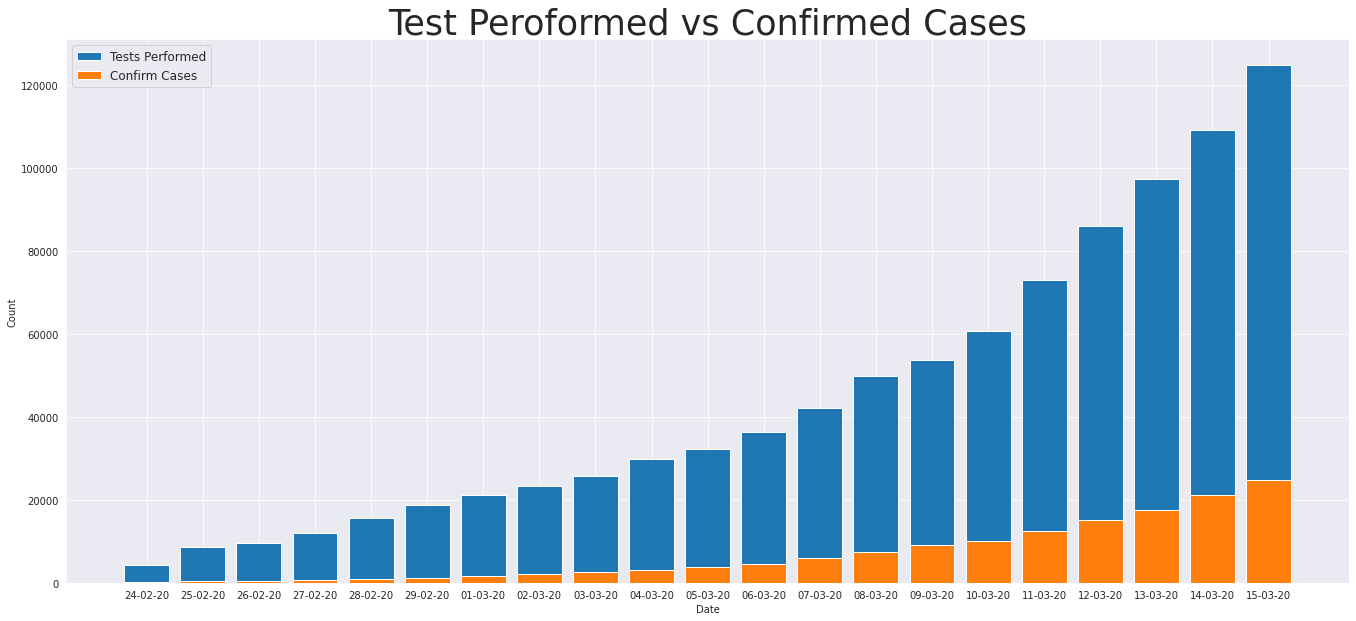

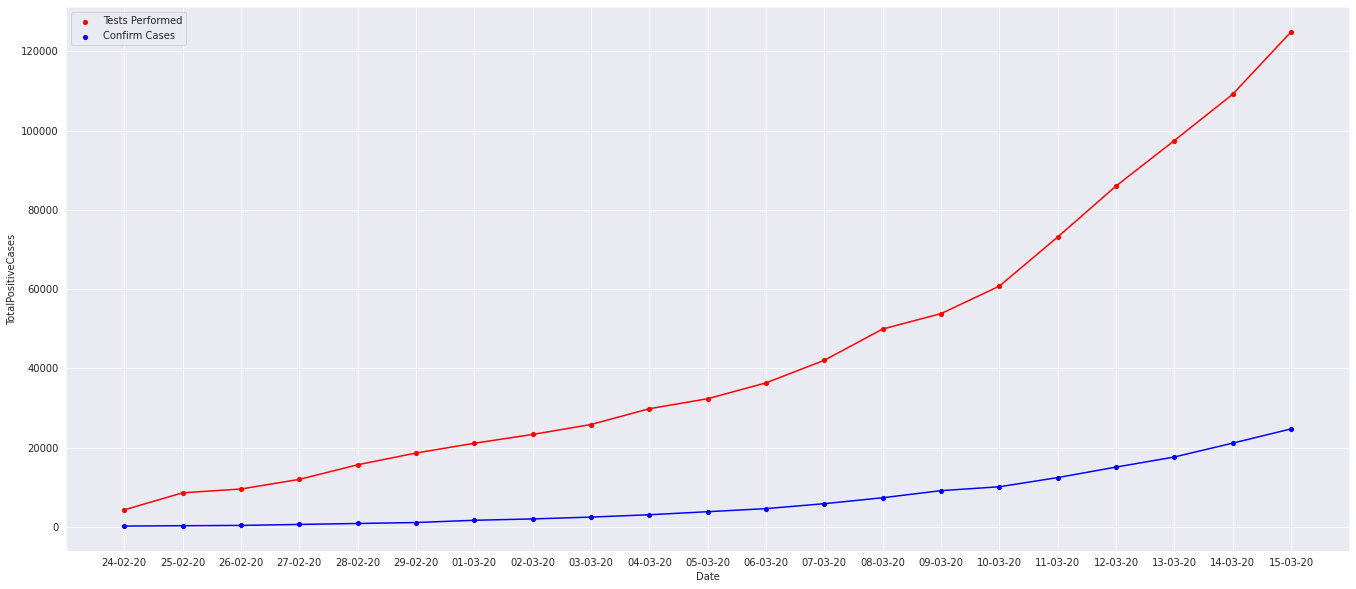

In [41]:
plt.figure(figsize=(23,10))
plt.bar(dgd2.Date, dgd2.TestsPerformed,label="Tests Performed")
plt.bar(dgd2.Date, dgd2.TotalPositiveCases,label="Confirm Cases")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Test Peroformed vs Confirmed Cases',fontsize = 35)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="Date", y="TestsPerformed", data=dgd2,
             color="red",label = "Tests Performed")
ax=sns.scatterplot(x="Date", y="TotalPositiveCases", data=dgd2,
             color="blue",label = "Confirm Cases")
plt.plot(dgd2.Date,dgd2.TestsPerformed,zorder=1,color="red")
plt.plot(dgd2.Date,dgd2.TotalPositiveCases,zorder=1,color="blue")

## Confirmed Cases vs People Hospitalized

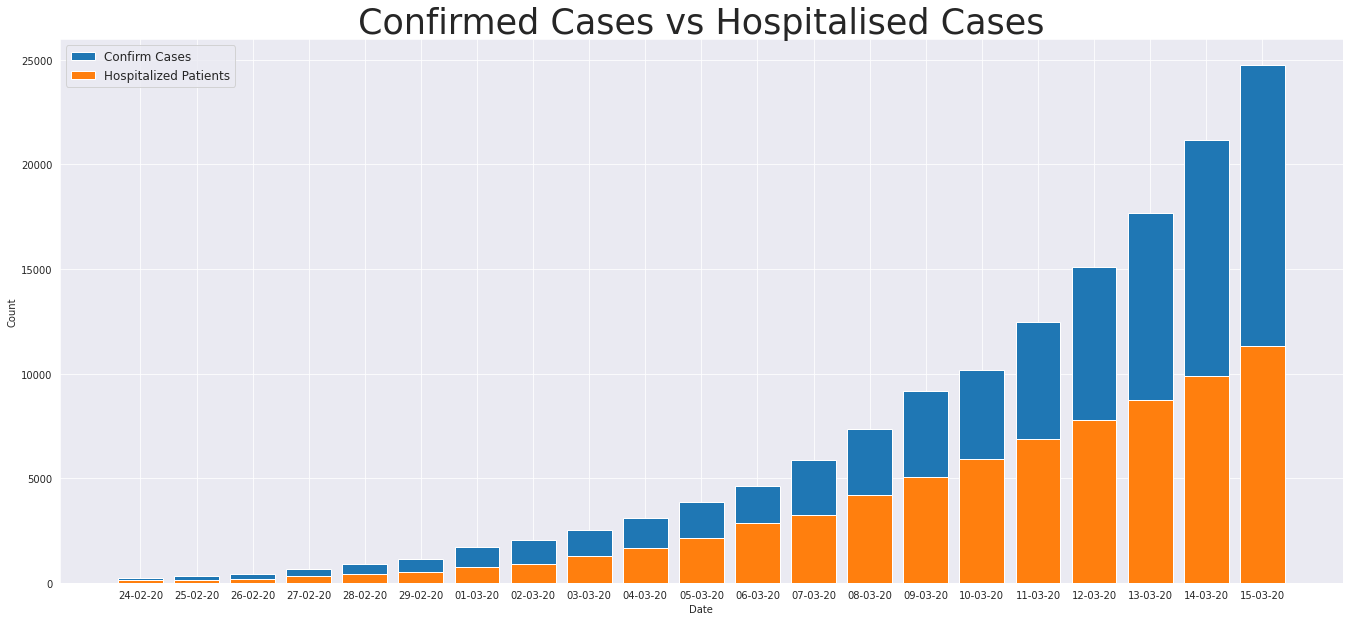

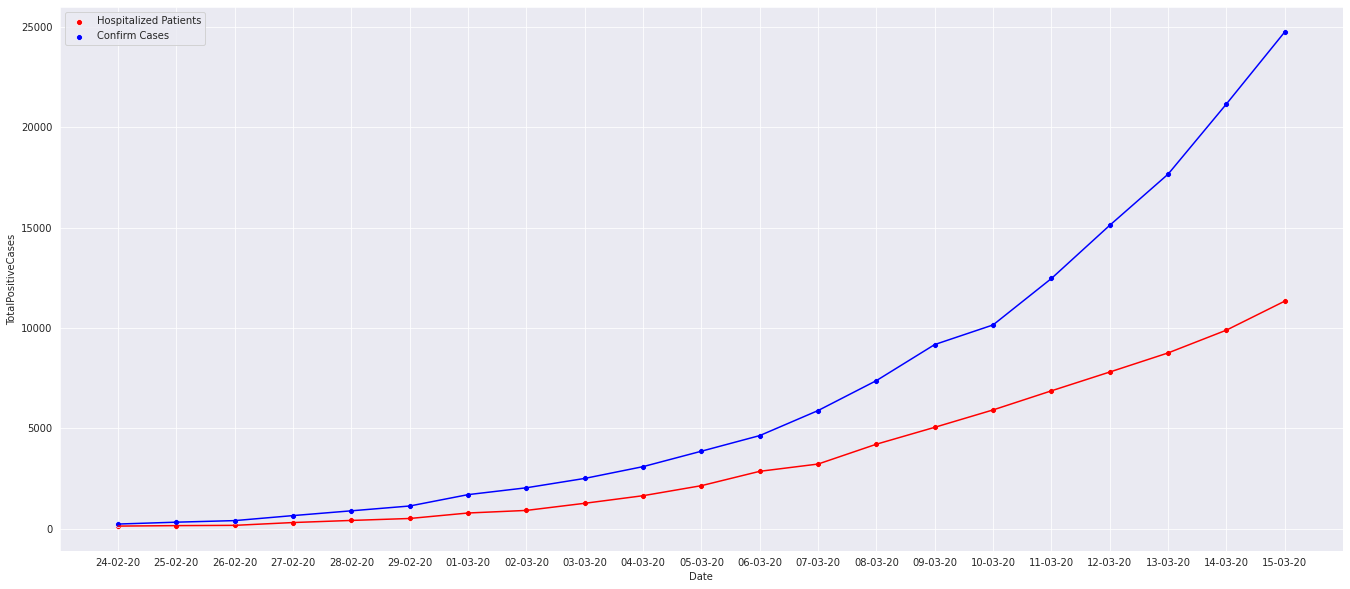

In [42]:
plt.figure(figsize=(23,10))
plt.bar(dgd2.Date, dgd2.TotalPositiveCases,label="Confirm Cases")
plt.bar(dgd2.Date, dgd2.TotalHospitalizedPatients,label="Hospitalized Patients")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirmed Cases vs Hospitalised Cases',fontsize= 35)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="Date", y="TotalHospitalizedPatients", data=dgd2,
             color="red",label = "Hospitalized Patients")
ax=sns.scatterplot(x="Date", y="TotalPositiveCases", data=dgd2,
             color="blue",label = "Confirm Cases")
plt.plot(dgd2.Date,dgd2.TotalHospitalizedPatients,zorder=1,color="red")
plt.plot(dgd2.Date,dgd2.TotalPositiveCases,zorder=1,color="blue")

## Hospitalized vs Recovery and Death

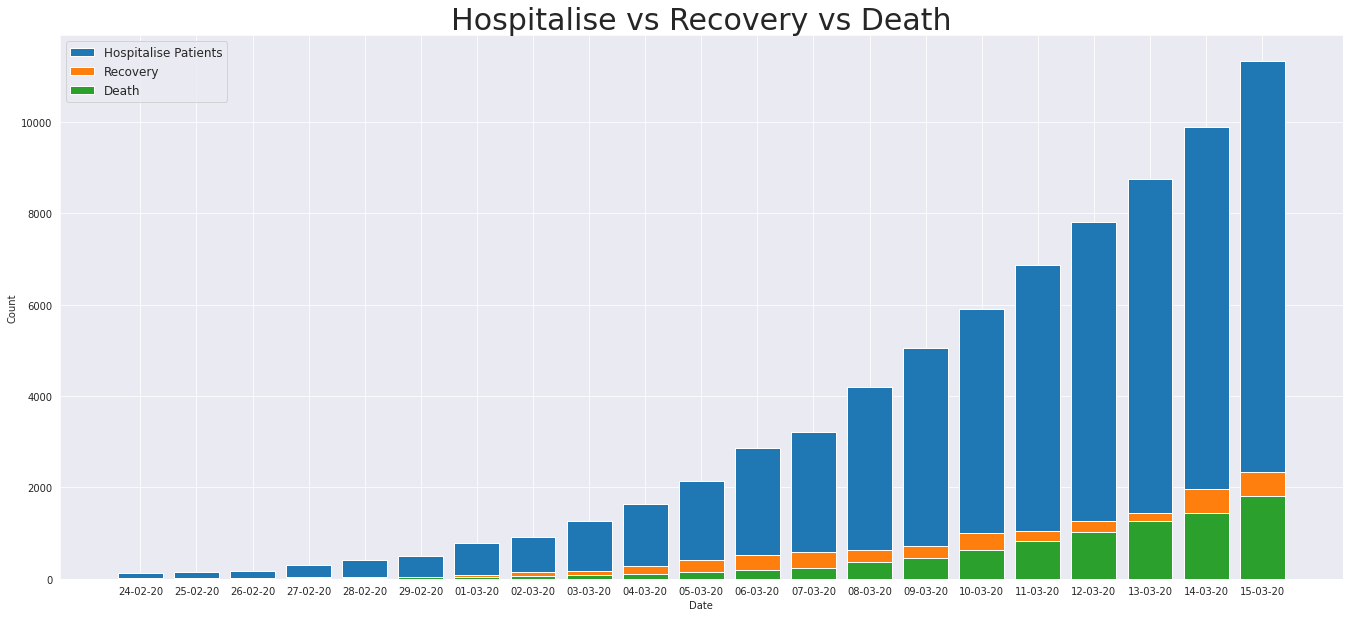

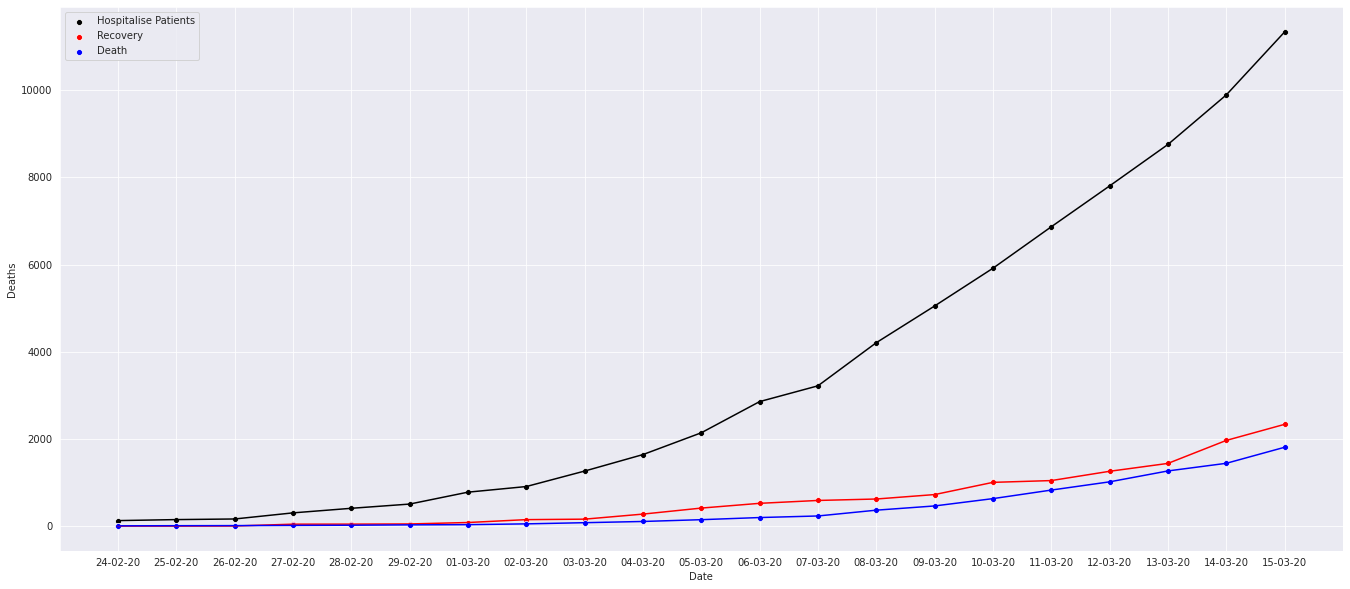

In [43]:
plt.figure(figsize=(23,10))
plt.bar(dgd2.Date, dgd2.TotalHospitalizedPatients,label="Hospitalise Patients")
plt.bar(dgd2.Date, dgd2.Recovered,label="Recovery")
plt.bar(dgd2.Date, dgd2.Deaths,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Hospitalise vs Recovery vs Death',fontsize=30)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="Date", y="TotalHospitalizedPatients", data=dgd2,
             color="black",label = "Hospitalise Patients")
ax=sns.scatterplot(x="Date", y="Recovered", data=dgd2,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="Date", y="Deaths", data=dgd2,
             color="blue",label = "Death")
plt.plot(dgd2.Date,dgd2.TotalHospitalizedPatients,zorder=1,color="black")
plt.plot(dgd2.Date,dgd2.Recovered,zorder=1,color="red")
plt.plot(dgd2.Date,dgd2.Deaths,zorder=1,color="blue")

## Confirm vs Recovery vs Death

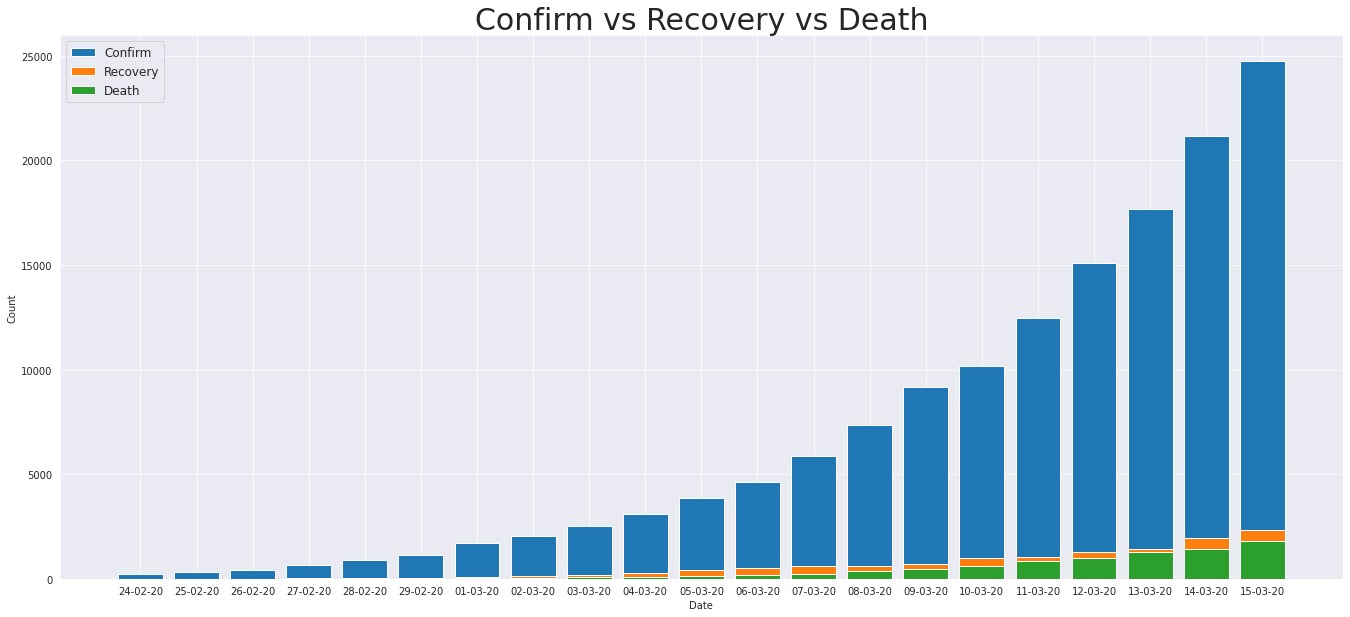

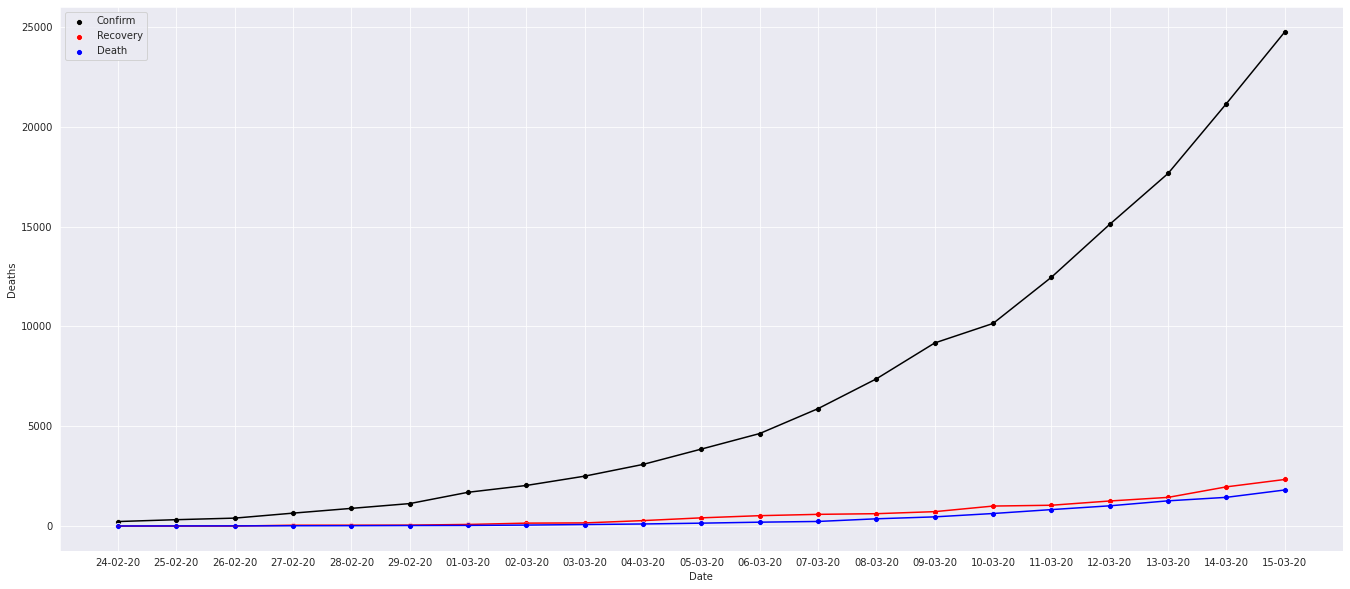

In [44]:
plt.figure(figsize=(23,10))
plt.bar(dgd2.Date, dgd2.TotalPositiveCases,label="Confirm")
plt.bar(dgd2.Date, dgd2.Recovered,label="Recovery")
plt.bar(dgd2.Date, dgd2.Deaths,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirm vs Recovery vs Death',fontsize=30)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="Date", y="TotalPositiveCases", data=dgd2,
             color="black",label = "Confirm")
ax=sns.scatterplot(x="Date", y="Recovered", data=dgd2,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="Date", y="Deaths", data=dgd2,
             color="blue",label = "Death")
plt.plot(dgd2.Date,dgd2.TotalPositiveCases,zorder=1,color="black")
plt.plot(dgd2.Date,dgd2.Recovered,zorder=1,color="red")
plt.plot(dgd2.Date,dgd2.Deaths,zorder=1,color="blue")

**This graph gives an overview of the current situation in Italy. There are now more than 12,000 confirmed cases. The numbers of deaths and recoveries are roughly equal. From the date the country confirmed its first case, the number has been increasing exponentially. On March 11, Italy became the second most infected country after China.**

In [45]:
data_groupby_date1 = data.groupby("Date")[['TotalPositiveCases', 'Deaths', 'Recovered','TestsPerformed','HospitalizedPatients','TotalHospitalizedPatients']].sum().reset_index()
dgd1 = data_groupby_date1
dgd1.head()

Date  TotalPositiveCases  Deaths  Recovered  TestsPerformed  \
0 2020-02-24                 229       7          1            4324   
1 2020-02-25                 322      10          1            8623   
2 2020-02-26                 400      12          3            9587   
3 2020-02-27                 650      17         45           12014   
4 2020-02-28                 888      21         46           15695   

   HospitalizedPatients  TotalHospitalizedPatients  
0                   101                        127  
1                   114                        150  
2                   128                        164  
3                   248                        304  
4                   345                        409

## Prophet  Algorithm

For Number of Test(Screening)

In [46]:
pr_data_test = dgd1.loc[:,['Date','TestsPerformed']]
pr_data_test.columns = ['ds','y']
pr_data_test.head()

ds      y
0 2020-02-24   4324
1 2020-02-25   8623
2 2020-02-26   9587
3 2020-02-27  12014
4 2020-02-28  15695

## Modeling

In [47]:
m = Prophet()
m.fit(pr_data_test)
future=m.make_future_dataframe(periods=365)
forecast_test=m.predict(future)
forecast_test

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-02-24 -8.033205e+03 -2.384539e+04  4.262947e+03 -8.033205e+03   
1   2020-02-25 -2.779788e+03 -1.912193e+04  9.139662e+03 -2.779788e+03   
2   2020-02-26  2.473629e+03 -1.415398e+04  1.413317e+04  2.473629e+03   
3   2020-02-27  7.727047e+03 -7.191063e+03  2.058540e+04  7.727047e+03   
4   2020-02-28  1.298046e+04  1.243300e+02  2.757311e+04  1.298046e+04   
..         ...           ...           ...           ...           ...   
381 2021-03-11  1.996830e+06  1.981125e+06  2.010530e+06  1.993239e+06   
382 2021-03-12  2.002093e+06  1.988235e+06  2.017803e+06  1.998483e+06   
383 2021-03-13  2.007355e+06  1.994908e+06  2.023111e+06  2.003732e+06   
384 2021-03-14  2.012618e+06  2.003753e+06  2.032019e+06  2.008982e+06   
385 2021-03-15  2.017880e+06  2.001192e+06  2.030850e+06  2.014232e+06   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -8.033205e+03    -1592.249421          -1592.249421          -1592.249421   
1   -2.779788e+03    -2267.753341          -2267.753341          -2267.753341   
2    2.473629e+03    -1745.205931          -1745.205931          -1745.205931   
3    7.727047e+03    -1066.010899          -1066.010899          -1066.010899   
4    1.298046e+04       62.285095             62.285095             62.285095   
..            ...             ...                   ...                   ...   
381  2.000476e+06    -1066.010899          -1066.010899          -1066.010899   
382  2.005744e+06       62.285095             62.285095             62.285095   
383  2.011022e+06     1588.101415           1588.101415           1588.101415   
384  2.016291e+06     5020.833083           5020.833083           5020.833083   
385  2.021564e+06    -1592.249421          -1592.249421          -1592.249421   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -1592.249421  -1592.249421  -1592.249421                   0.0   
1   -2267.753341  -2267.753341  -2267.753341                   0.0   
2   -1745.205931  -1745.205931  -1745.205931                   0.0   
3   -1066.010899  -1066.010899  -1066.010899                   0.0   
4      62.285095     62.285095     62.285095                   0.0   
..           ...           ...           ...                   ...   
381 -1066.010899  -1066.010899  -1066.010899                   0.0   
382    62.285095     62.285095     62.285095                   0.0   
383  1588.101415   1588.101415   1588.101415                   0.0   
384  5020.833083   5020.833083   5020.833083                   0.0   
385 -1592.249421  -1592.249421  -1592.249421                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -9.625455e+03  
1                           0.0                         0.0 -5.047541e+03  
2                           0.0                         0.0  7.284235e+02  
3                           0.0                         0.0  6.661036e+03  
4                           0.0                         0.0  1.304275e+04  
..                          ...                         ...           ...  
381                         0.0                         0.0  1.995764e+06  
382                         0.0                         0.0  2.002155e+06  
383                         0.0                         0.0  2.008943e+06  
384                         0.0                         0.0  2.017638e+06  
385                         0.0                         0.0  2.016288e+06  

[386 rows x 16 columns]

## Predicting

In [48]:
test = forecast_test.loc[:,['ds','trend']]
test = test[test['trend']>0]
test.head()
test=test.head(45)
test=test.tail(30)
test.columns = ['Date','Screening']
test.head()


Date      Screening
17 2020-03-12   81328.849859
18 2020-03-13   86591.216758
19 2020-03-14   91853.583658
20 2020-03-15   97115.950557
21 2020-03-16  102378.317456

## Graphical Representation of Predicted Screening

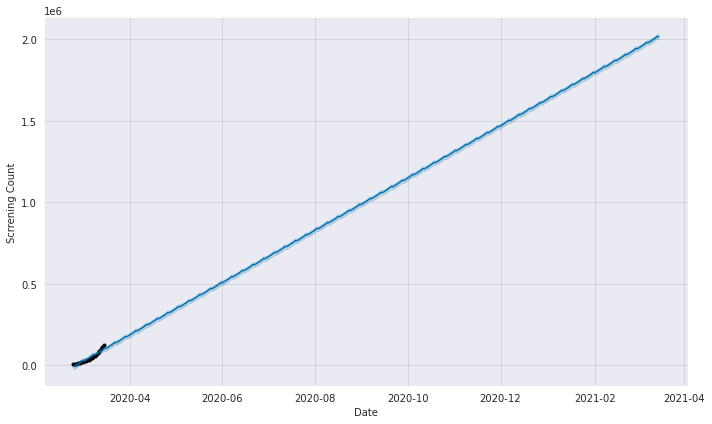

In [49]:
fig_test = plot_plotly(m, forecast_test)
py.iplot(fig_test) 

fig_test = m.plot(forecast_test,xlabel='Date',ylabel='Scrrening Count')

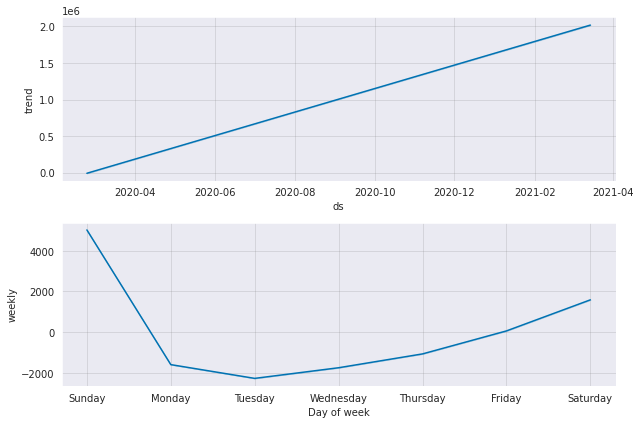

In [50]:
figure_test=m.plot_components(forecast_test)


**The graph predicts the total number of screenings required to bring the condition of Italy under control. By March 2021, when there will be more than 1.4 million screenings, the situation will be under control. The graph is linear, as European governments are supposed to work accordingly.**

# Confirmed Cases

## Making Data Ready for Algorithm

In [51]:
pr_data_cm = dgd1.loc[:,['Date','TotalPositiveCases']]
pr_data_cm.columns = ['ds','y']
pr_data_cm.head()

ds    y
0 2020-02-24  229
1 2020-02-25  322
2 2020-02-26  400
3 2020-02-27  650
4 2020-02-28  888

## Modelling

In [52]:
m=Prophet()
m.fit(pr_data_cm)
future=m.make_future_dataframe(periods=365)
forecast_cm=m.predict(future)
forecast_cm

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


ds          trend     yhat_lower     yhat_upper    trend_lower  \
0   2020-02-24   -3812.930462   -7133.885238     -44.740612   -3812.930462   
1   2020-02-25   -2740.546396   -6764.988987     596.621020   -2740.546396   
2   2020-02-26   -1668.162329   -5718.032269    1298.529457   -1668.162329   
3   2020-02-27    -595.778265   -4421.000991    2397.764405    -595.778265   
4   2020-02-28     476.605803   -3517.501077    3977.787591     476.605803   
..         ...            ...            ...            ...            ...   
381 2021-03-11  404959.355050  401041.972905  408194.912437  404725.862556   
382 2021-03-12  406032.264295  402081.095265  409251.035301  405798.166514   
383 2021-03-13  407105.173539  403652.382231  411022.474540  406870.430833   
384 2021-03-14  408178.082784  405962.672356  413078.782760  407942.695190   
385 2021-03-15  409250.992028  405886.413359  412926.816532  409014.959916   

       trend_upper  additive_terms  additive_terms_lower  \
0     -3812.930462      116.980755            116.980755   
1     -2740.546396     -445.111306           -445.111306   
2     -1668.162329     -524.785891           -524.785891   
3      -595.778265     -372.896847           -372.896847   
4       476.605803     -256.798636           -256.798636   
..             ...             ...                   ...   
381  405172.058654     -372.896847           -372.896847   
382  406246.127804     -256.798636           -256.798636   
383  407320.248695      334.576218            334.576218   
384  408394.371057     1148.035707           1148.035707   
385  409468.504868      116.980755            116.980755   

     additive_terms_upper       weekly  weekly_lower  weekly_upper  \
0              116.980755   116.980755    116.980755    116.980755   
1             -445.111306  -445.111306   -445.111306   -445.111306   
2             -524.785891  -524.785891   -524.785891   -524.785891   
3             -372.896847  -372.896847   -372.896847   -372.896847   
4             -256.798636  -256.798636   -256.798636   -256.798636   
..                    ...          ...           ...           ...   
381           -372.896847  -372.896847   -372.896847   -372.896847   
382           -256.798636  -256.798636   -256.798636   -256.798636   
383            334.576218   334.576218    334.576218    334.576218   
384           1148.035707  1148.035707   1148.035707   1148.035707   
385            116.980755   116.980755    116.980755    116.980755   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
381                   0.0                         0.0   
382                   0.0                         0.0   
383                   0.0                         0.0   
384                   0.0                         0.0   
385                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
0                           0.0   -3695.949707  
1                           0.0   -3185.657702  
2                           0.0   -2192.948220  
3                           0.0    -968.675112  
4                           0.0     219.807167  
..                          ...            ...  
381                         0.0  404586.458203  
382                         0.0  405775.465659  
383                         0.0  407439.749757  
384                         0.0  409326.118490  
385                         0.0  409367.972783  

[386 rows x 16 columns]

## Predicting

In [53]:
cnfrm = forecast_cm.loc[:,['ds','trend']]
cnfrm = cnfrm[cnfrm['trend']>0]
cnfrm.head()
cnfrm=cnfrm.head(42)
cnfrm=cnfrm.tail(30)
cnfrm.columns = ['Date','Confirm']
cnfrm.head()

Date       Confirm
16 2020-03-11  13347.480803
17 2020-03-12  14420.390048
18 2020-03-13  15493.299293
19 2020-03-14  16566.208537
20 2020-03-15  17639.117782

## Graphical Representation of Predicted Confirmation

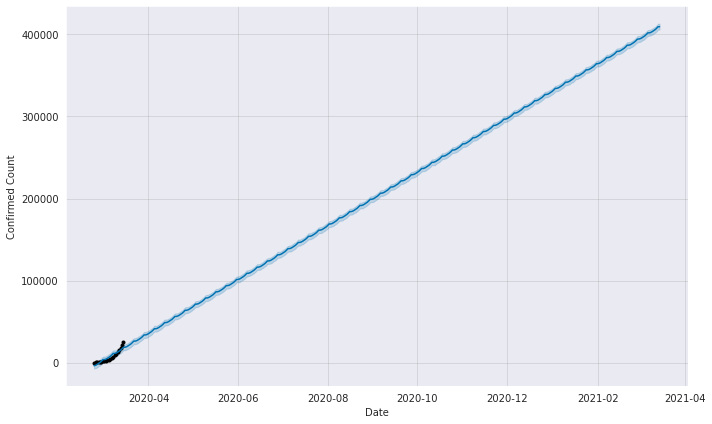

In [54]:
fig_cm = plot_plotly(m, forecast_cm)
py.iplot(fig_cm) 

fig_cm = m.plot(forecast_cm,xlabel='Date',ylabel='Confirmed Count')

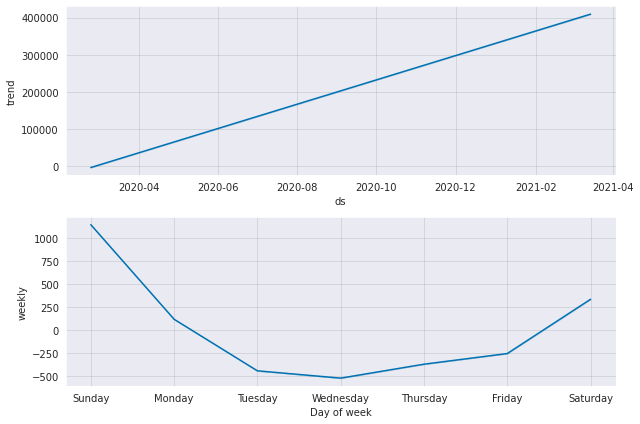

In [55]:
figure_cm=m.plot_components(forecast_cm)


**Predicting the number of cases confirmed in Italy by February 2021. There will be more than 250,000 people who will be affected by the coronavirus.**


# Recovery

## Making Data Ready for the Algorithm

In [56]:
pr_data_r = dgd1.loc[:,['Date','Recovered']]
pr_data_r.columns = ['ds','y']
pr_data_r.head()

ds   y
0 2020-02-24   1
1 2020-02-25   1
2 2020-02-26   3
3 2020-02-27  45
4 2020-02-28  46

## Modelling

In [57]:
m=Prophet()
m.fit(pr_data_r)
future=m.make_future_dataframe(periods=365)
forecast_r=m.predict(future)
forecast_r

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-02-24   -366.652470   -747.654937    -27.720332   -366.652470   
1   2020-02-25   -269.394102   -640.951223     39.143299   -269.394102   
2   2020-02-26   -172.135734   -554.472649     55.625600   -172.135734   
3   2020-02-27    -74.877366   -426.772769    243.564761    -74.877366   
4   2020-02-28     22.381003   -344.463152    331.285636     22.381003   
..         ...           ...           ...           ...           ...   
381 2021-03-11  36688.920308  36340.428767  36996.554410  36688.756470   
382 2021-03-12  36786.179041  36413.497171  37061.370366  36786.014489   
383 2021-03-13  36883.437775  36615.969053  37272.072487  36883.272704   
384 2021-03-14  36980.696508  36755.716856  37401.228187  36980.530916   
385 2021-03-15  37077.955242  36713.887633  37422.040009  37077.789132   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     -366.652470      -23.061611            -23.061611            -23.061611   
1     -269.394102      -23.371229            -23.371229            -23.371229   
2     -172.135734      -67.683589            -67.683589            -67.683589   
3      -74.877366      -33.995334            -33.995334            -33.995334   
4       22.381003      -34.308285            -34.308285            -34.308285   
..            ...             ...                   ...                   ...   
381  36689.091686      -33.995334            -33.995334            -33.995334   
382  36786.350911      -34.308285            -34.308285            -34.308285   
383  36883.610144       67.377930             67.377930             67.377930   
384  36980.869377      115.042118            115.042118            115.042118   
385  37078.128961      -23.061611            -23.061611            -23.061611   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0    -23.061611    -23.061611    -23.061611                   0.0   
1    -23.371229    -23.371229    -23.371229                   0.0   
2    -67.683589    -67.683589    -67.683589                   0.0   
3    -33.995334    -33.995334    -33.995334                   0.0   
4    -34.308285    -34.308285    -34.308285                   0.0   
..          ...           ...           ...                   ...   
381  -33.995334    -33.995334    -33.995334                   0.0   
382  -34.308285    -34.308285    -34.308285                   0.0   
383   67.377930     67.377930     67.377930                   0.0   
384  115.042118    115.042118    115.042118                   0.0   
385  -23.061611    -23.061611    -23.061611                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0   -389.714082  
1                           0.0                         0.0   -292.765331  
2                           0.0                         0.0   -239.819322  
3                           0.0                         0.0   -108.872700  
4                           0.0                         0.0    -11.927283  
..                          ...                         ...           ...  
381                         0.0                         0.0  36654.924974  
382                         0.0                         0.0  36751.870756  
383                         0.0                         0.0  36950.815705  
384                         0.0                         0.0  37095.738627  
385                         0.0                         0.0  37054.893631  

[386 rows x 16 columns]

## Predicting

In [58]:
rec = forecast_r.loc[:,['ds','trend']]
rec = rec[rec['trend']>0]
rec.head()
rec=rec.head(42)
rec=rec.tail(30)
rec.columns = ['Date','Recovery']
rec.head()

Date     Recovery
16 2020-03-11  1189.482589
17 2020-03-12  1286.741323
18 2020-03-13  1384.000056
19 2020-03-14  1481.258790
20 2020-03-15  1578.517523

## Graphical Representation of Predicted Recovery

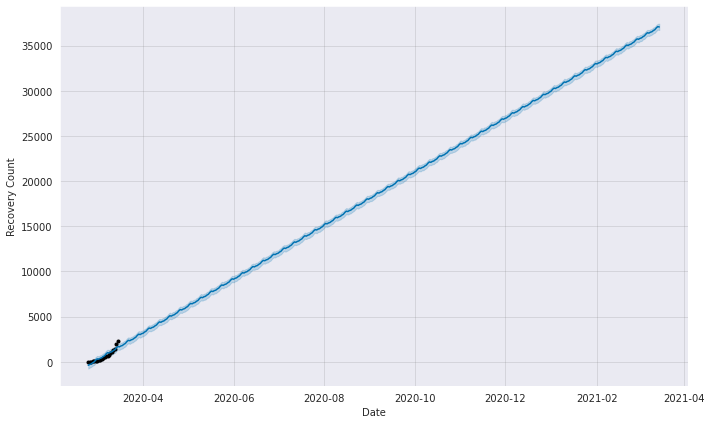

In [59]:
fig_r = plot_plotly(m, forecast_r)
py.iplot(fig_r) 

fig_r = m.plot(forecast_r,xlabel='Date',ylabel='Recovery Count')

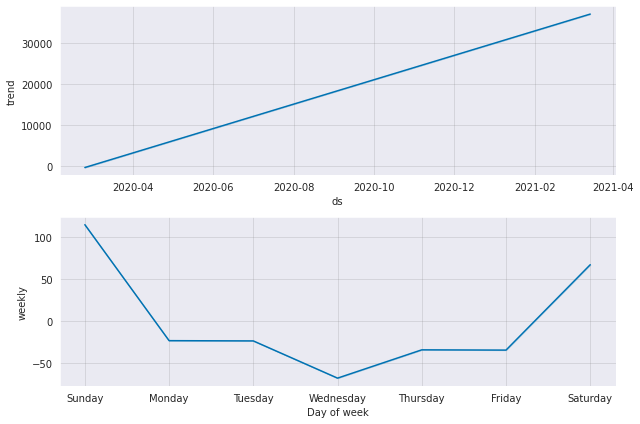

In [60]:
figure_r=m.plot_components(forecast_r)


# For Deaths

## Making Data Ready for the Algorithm

In [61]:
pr_data_d = dgd1.loc[:,['Date','Deaths']]
pr_data_d.columns = ['ds','y']
pr_data_d.head()

ds   y
0 2020-02-24   7
1 2020-02-25  10
2 2020-02-26  12
3 2020-02-27  17
4 2020-02-28  21

## Modelling

In [62]:
m=Prophet()
m.fit(pr_data_d)
future=m.make_future_dataframe(periods=365)
forecast_d=m.predict(future)
forecast_d

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-02-24   -329.289469   -680.496195    -34.892250   -329.289469   
1   2020-02-25   -254.645097   -621.788158     57.550337   -254.645097   
2   2020-02-26   -180.000725   -531.564648    115.567684   -180.000725   
3   2020-02-27   -105.356353   -442.765037    184.640092   -105.356353   
4   2020-02-28    -30.711982   -380.576715    270.926476    -30.711982   
..         ...           ...           ...           ...           ...   
381 2021-03-11  28111.034569  27772.964128  28387.737738  28110.148754   
382 2021-03-12  28185.681153  27881.237898  28523.585490  28184.792252   
383 2021-03-13  28260.327737  27925.281726  28588.313134  28259.436274   
384 2021-03-14  28334.974321  28107.502327  28756.792014  28334.076722   
385 2021-03-15  28409.620905  28071.512499  28709.874139  28408.717278   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     -329.289469      -19.478936            -19.478936            -19.478936   
1     -254.645097      -28.143445            -28.143445            -28.143445   
2     -180.000725      -27.455700            -27.455700            -27.455700   
3     -105.356353      -23.762154            -23.762154            -23.762154   
4      -30.711982        2.643936              2.643936              2.643936   
..            ...             ...                   ...                   ...   
381  28111.996270      -23.762154            -23.762154            -23.762154   
382  28186.644838        2.643936              2.643936              2.643936   
383  28261.295519        0.993377              0.993377              0.993377   
384  28335.946354       95.202922             95.202922             95.202922   
385  28410.597326      -19.478936            -19.478936            -19.478936   

        weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -19.478936    -19.478936    -19.478936                   0.0   
1   -28.143445    -28.143445    -28.143445                   0.0   
2   -27.455700    -27.455700    -27.455700                   0.0   
3   -23.762154    -23.762154    -23.762154                   0.0   
4     2.643936      2.643936      2.643936                   0.0   
..         ...           ...           ...                   ...   
381 -23.762154    -23.762154    -23.762154                   0.0   
382   2.643936      2.643936      2.643936                   0.0   
383   0.993377      0.993377      0.993377                   0.0   
384  95.202922     95.202922     95.202922                   0.0   
385 -19.478936    -19.478936    -19.478936                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0   -348.768404  
1                           0.0                         0.0   -282.788541  
2                           0.0                         0.0   -207.456425  
3                           0.0                         0.0   -129.118508  
4                           0.0                         0.0    -28.068046  
..                          ...                         ...           ...  
381                         0.0                         0.0  28087.272415  
382                         0.0                         0.0  28188.325089  
383                         0.0                         0.0  28261.321113  
384                         0.0                         0.0  28430.177243  
385                         0.0                         0.0  28390.141969  

[386 rows x 16 columns]

## Predicting

In [63]:
dth = forecast_d.loc[:,['ds','trend']]
dth = dth[dth['trend']>0]
dth=dth.head(42)
dth=dth.tail(30)
dth.columns = ['Date','Death']
dth.head()


Date        Death
17 2020-03-12   939.678055
18 2020-03-13  1014.324638
19 2020-03-14  1088.971222
20 2020-03-15  1163.617806
21 2020-03-16  1238.264390

## Graphical Representation of Predicted Death

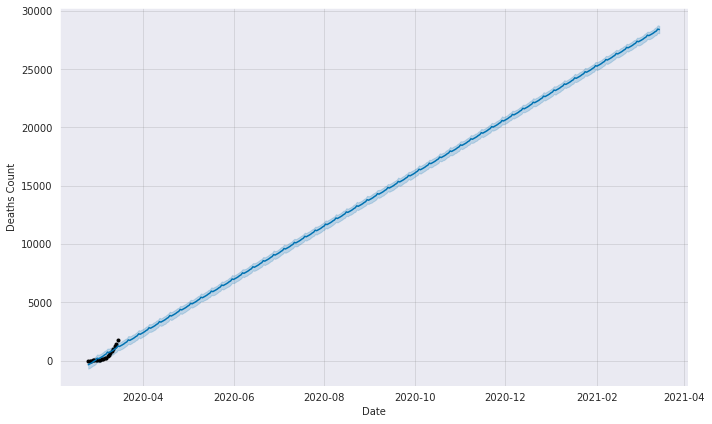

In [64]:
fig_d = plot_plotly(m, forecast_d)
py.iplot(fig_d) 

fig_d = m.plot(forecast_d,xlabel='Date',ylabel='Deaths Count')

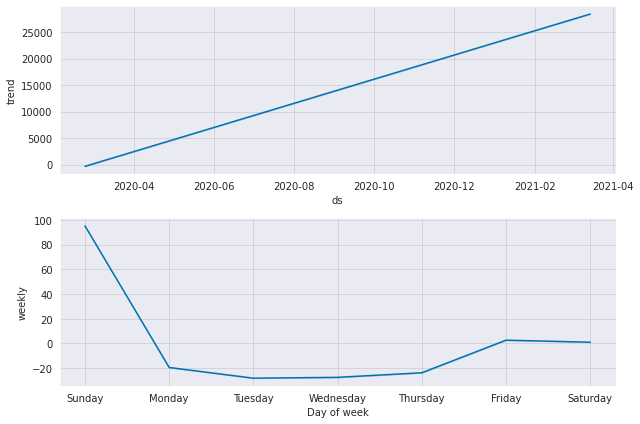

In [65]:
figure_d=m.plot_components(forecast_d)


**The current situation is not under control. According to current data on confirmed patients, 53% will recover, whereas 47% will die. But the prediction says there will approximately 25,000 people who will recover and around 14,000 people who will die by February 2021. The rest will be in isolation.**

# What the Future Looks Like

In [66]:
prediction = test
prediction['Confirm'] = cnfrm.Confirm
prediction['Recover'] = rec.Recovery
prediction['Death'] = dth.Death

In [67]:
prediction.head()

Date      Screening       Confirm      Recover        Death
17 2020-03-12   81328.849859  14420.390048  1286.741323   939.678055
18 2020-03-13   86591.216758  15493.299293  1384.000056  1014.324638
19 2020-03-14   91853.583658  16566.208537  1481.258790  1088.971222
20 2020-03-15   97115.950557  17639.117782  1578.517523  1163.617806
21 2020-03-16  102378.317456  18712.027026  1675.776257  1238.264390

## Future Ratios

In [68]:
pps_pts = float(prediction.Confirm.sum()/prediction.Screening.sum())
pd_pts = float(prediction.Death.sum()/prediction.Screening.sum())
pr_pps = float(prediction.Recover.sum()/prediction.Confirm.sum())
pd_pps = float(prediction.Death.sum()/prediction.Confirm.sum())

In [69]:
print("The percentage of  Predicted Confirmation is "+ str(pps_pts*100) )
print("The percentage of Predicted Death is "+ str(pd_pts*100) )
print("The percentage of Predicted Death after confirmation is "+ str(pd_pps*100) )
print("The percentage of Predicted recovery after confirmation is "+ str(pr_pps*100) )

The percentage of  Predicted Confirmation is 18.054416364320886
The percentage of Predicted Death is 1.2827589024425685
The percentage of Predicted Death after confirmation is 7.104959122232025
The percentage of Predicted recovery after confirmation is 8.995458185582729


> ### Prevention
To avoid infection, people should do the following things:
*  Avoid contact with people who are sick.
*  Avoid touching your eyes, nose, and mouth.
*  Stay home when you are sick.
*  Cover your cough or sneeze with a tissue, then throw the tissue in the trash.
*  Clean and disinfect frequently touched objects and surfaces
*  Wash your hands often with soap and water, especially after going to the bathroom; before eating; and after blowing your nose, coughing, or sneezing. If soap and water are not readily available, use an alcohol-based hand sanitizer.<br>